<a href="https://colab.research.google.com/github/nasimIsmail/Road_Damage_Detection_And_Classification/blob/main/Road_Damage_detection%26Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics
!pip install opencv-python
!pip install pillow
!pip install matplotlib
!pip install numpy
!pip install kaggle



In [ ]:
from ultralytics import YOLO
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import os

base_dir = "/content/drive/MyDrive/RD2022"
train_images_dir = os.path.join(base_dir, "train", "images")
train_labels_dir = os.path.join(base_dir, "train", "labels")
val_images_dir   = os.path.join(base_dir, "val", "images")
val_labels_dir   = os.path.join(base_dir, "val", "labels")
test_images_dir  = os.path.join(base_dir, "test", "images")
test_labels_dir  = os.path.join(base_dir, "test", "labels")

print("Base dir:", base_dir)
print("Train images exist? ", os.path.isdir(train_images_dir))
print("Train labels exist? ", os.path.isdir(train_labels_dir))
print("Val images exist?   ", os.path.isdir(val_images_dir))
print("Val labels exist?   ", os.path.isdir(val_labels_dir))
print("Test images exist?  ", os.path.isdir(test_images_dir))
print("Test labels exist?  ", os.path.isdir(test_labels_dir))


Base dir: /content/drive/MyDrive/RD2022
Train images exist?  True
Train labels exist?  True
Val images exist?    True
Val labels exist?    True
Test images exist?   True
Test labels exist?   True


In [ ]:
data_yaml_path = os.path.join(base_dir, "data.yaml")

data_yaml_content = f"""
path: {base_dir}

train: train/images
val: val/images
test: test/images

names:
  0: D00
  1: D10
  2: D20
  3: D40
"""

with open(data_yaml_path, "w") as f:
    f.write(data_yaml_content)

print("data.yaml written to:", data_yaml_path)
print("====== data.yaml ======")
print(data_yaml_content)


data.yaml written to: /content/drive/MyDrive/RD2022/data.yaml
====== data.yaml ======

path: /content/drive/MyDrive/RD2022

train: train/images
val: val/images
test: test/images

names:
  0: D00
  1: D10
  2: D20
  3: D40



In [ ]:
from ultralytics import YOLO

yolo_model = YOLO("yolov8n.pt")

results = yolo_model.train(
    data=data_yaml_path,
    epochs=50,
    imgsz=640,
    batch=16,
    project=os.path.join(base_dir, "runs"),
    name="yolo_train",
    exist_ok=True
)


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)


In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/RD2022/runs/yolo_train/weights/best.pt")

results = model.predict(
    source="/content/drive/MyDrive/RD2022/test/images",
    save=True,
    imgsz=640
)


Streaming output truncated to the last 5000 lines.
image 761/5758 /content/drive/MyDrive/RD2022/test/images/Czech_000604.jpg: 640x640 (no detections), 6.2ms
image 762/5758 /content/drive/MyDrive/RD2022/test/images/Czech_000608.jpg: 640x640 (no detections), 6.2ms
image 763/5758 /content/drive/MyDrive/RD2022/test/images/Czech_000642.jpg: 640x640 (no detections), 6.3ms
image 764/5758 /content/drive/MyDrive/RD2022/test/images/Czech_000648.jpg: 640x640 (no detections), 6.2ms
image 765/5758 /content/drive/MyDrive/RD2022/test/images/Czech_000663.jpg: 640x640 (no detections), 6.2ms
image 766/5758 /content/drive/MyDrive/RD2022/test/images/Czech_000665.jpg: 640x640 1 D00, 6.2ms
image 767/5758 /content/drive/MyDrive/RD2022/test/images/Czech_000676.jpg: 640x640 (no detections), 6.2ms
image 768/5758 /content/drive/MyDrive/RD2022/test/images/Czech_000685.jpg: 640x640 (no detections), 6.3ms
image 769/5758 /content/drive/MyDrive/RD2022/test/images/Czech_000701.jpg: 640x640 1 D00, 6.2ms
image 770/5758 

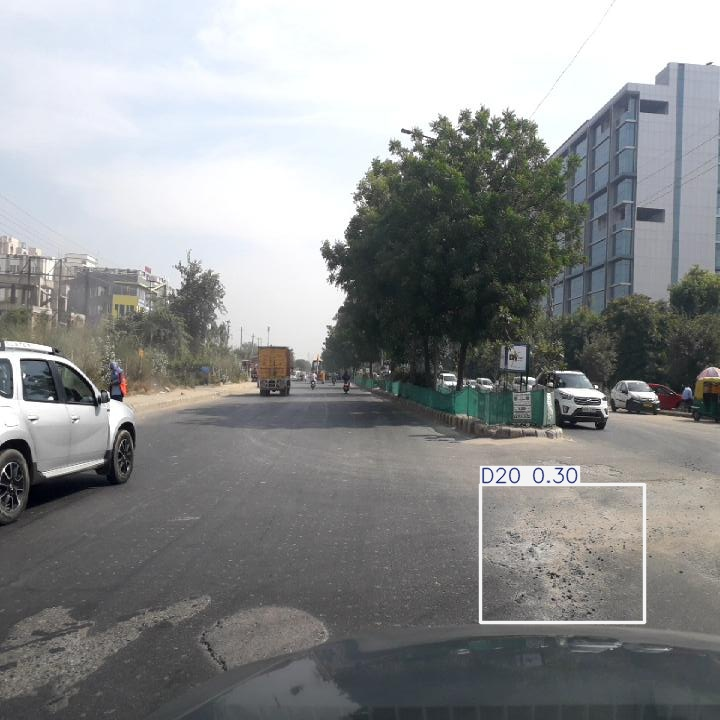

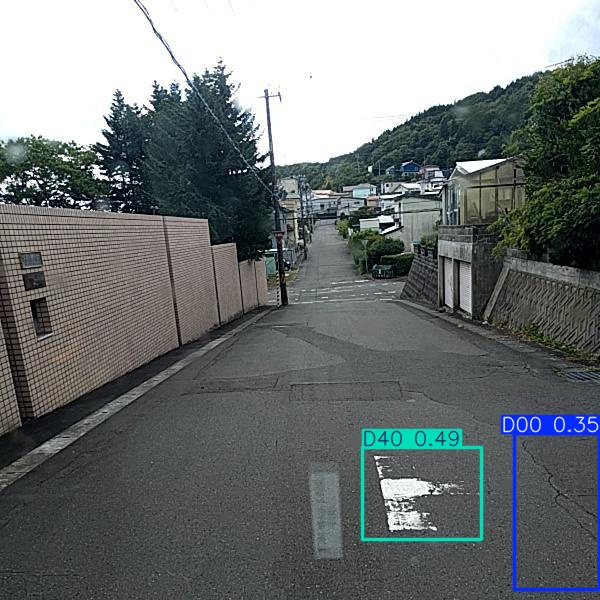

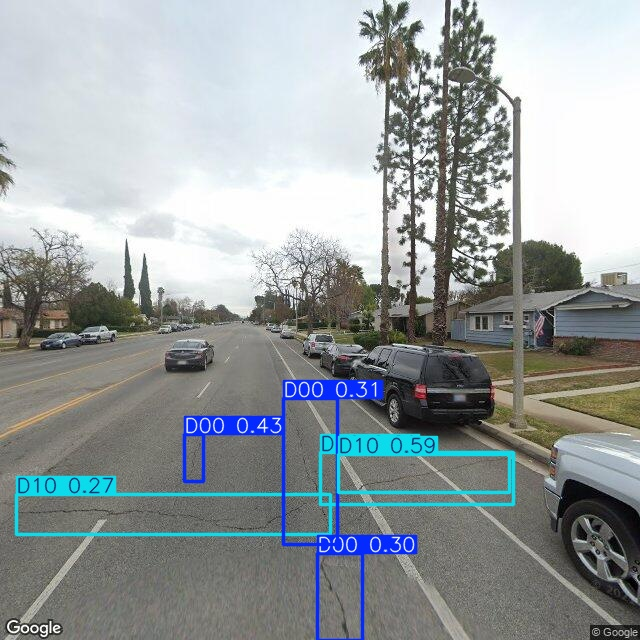

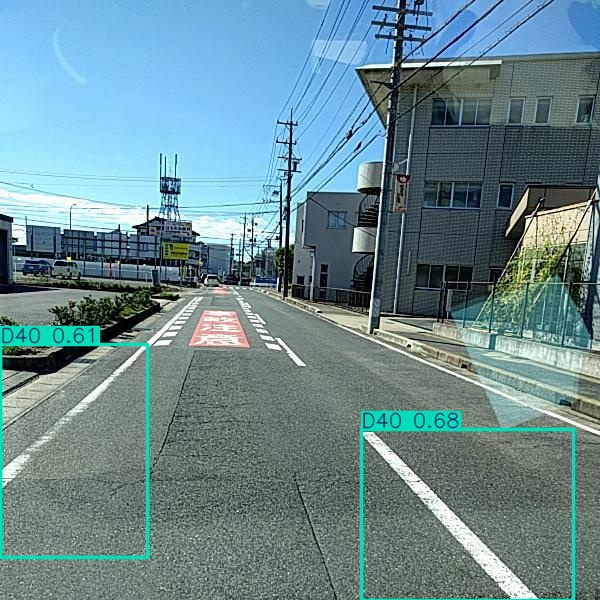

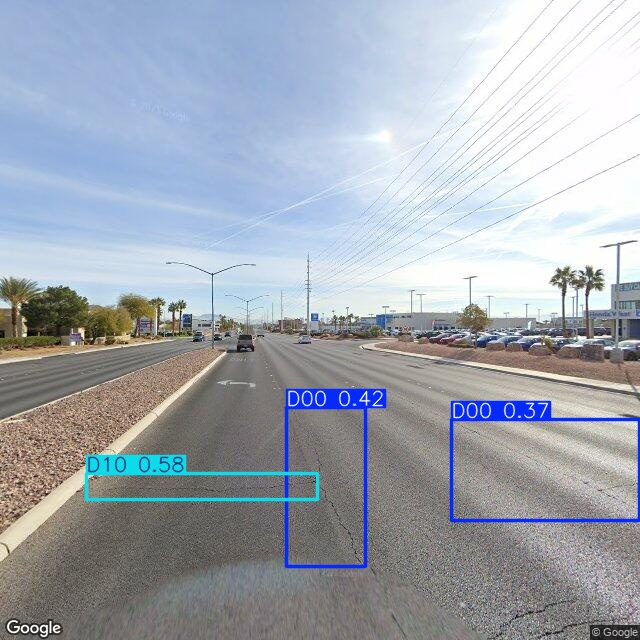

In [ ]:
from IPython.display import Image, display
import os

pred_path = "/content/runs/detect/predict"

for img_file in os.listdir(pred_path)[:5]:
    display(Image(filename=os.path.join(pred_path, img_file)))


Box Precision-Recall Curve


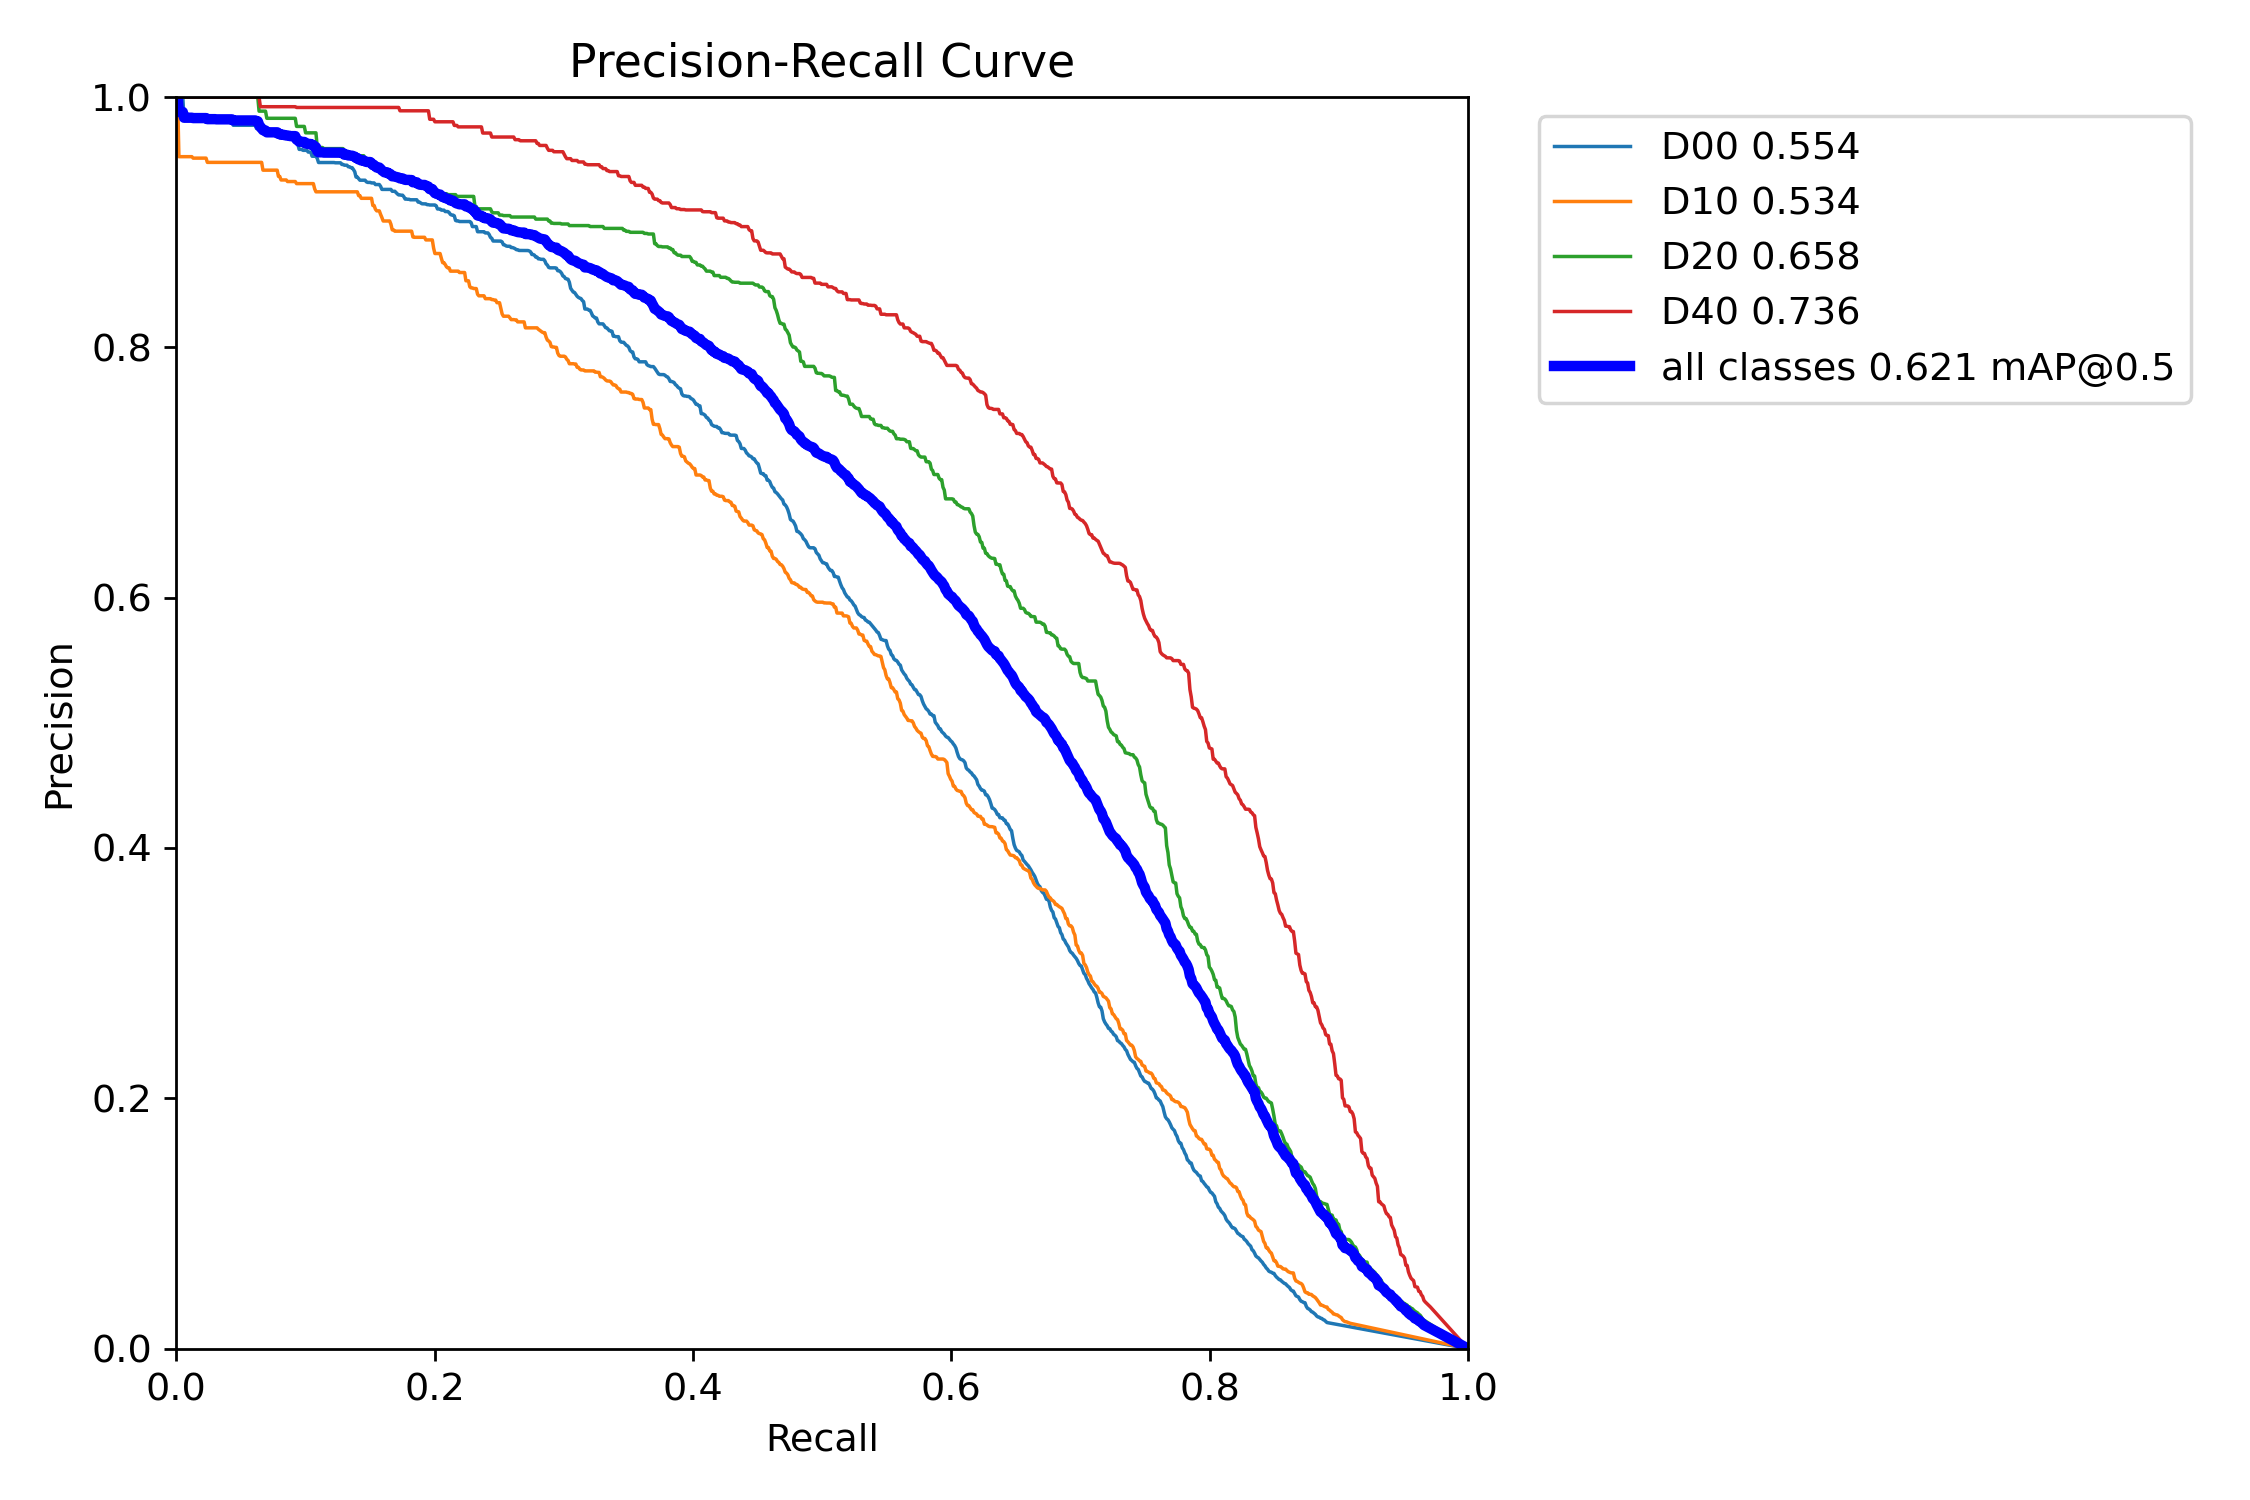

 Box F1 Curve


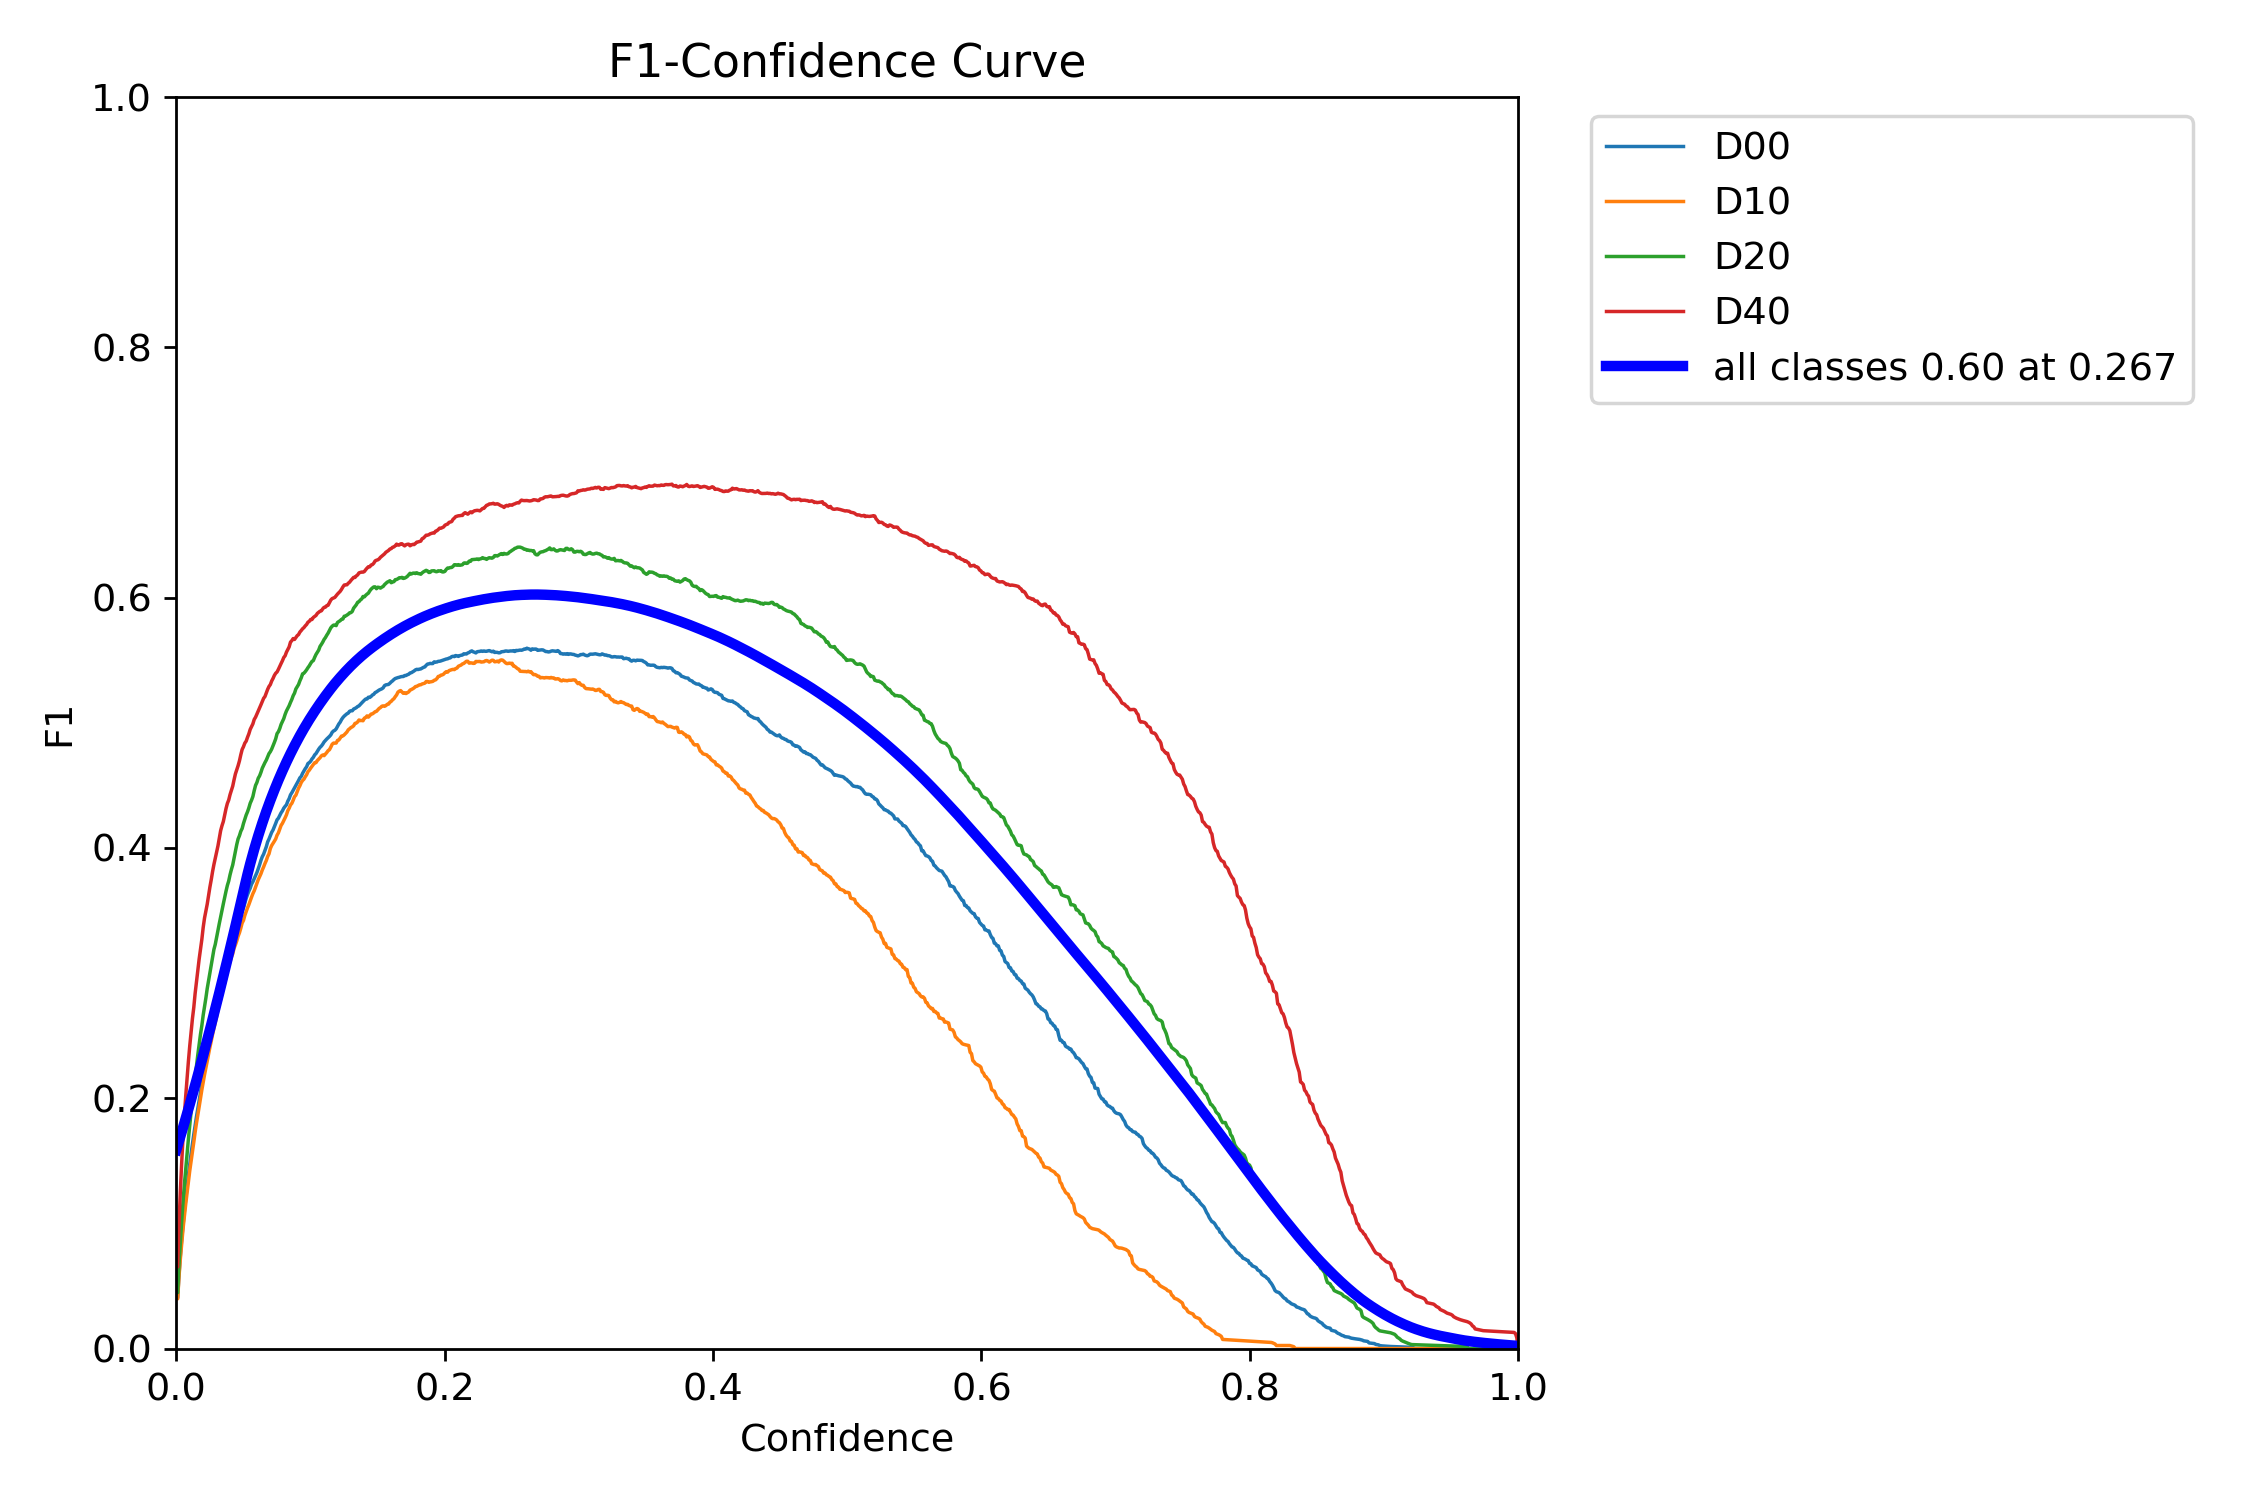

 Box Precision Curve


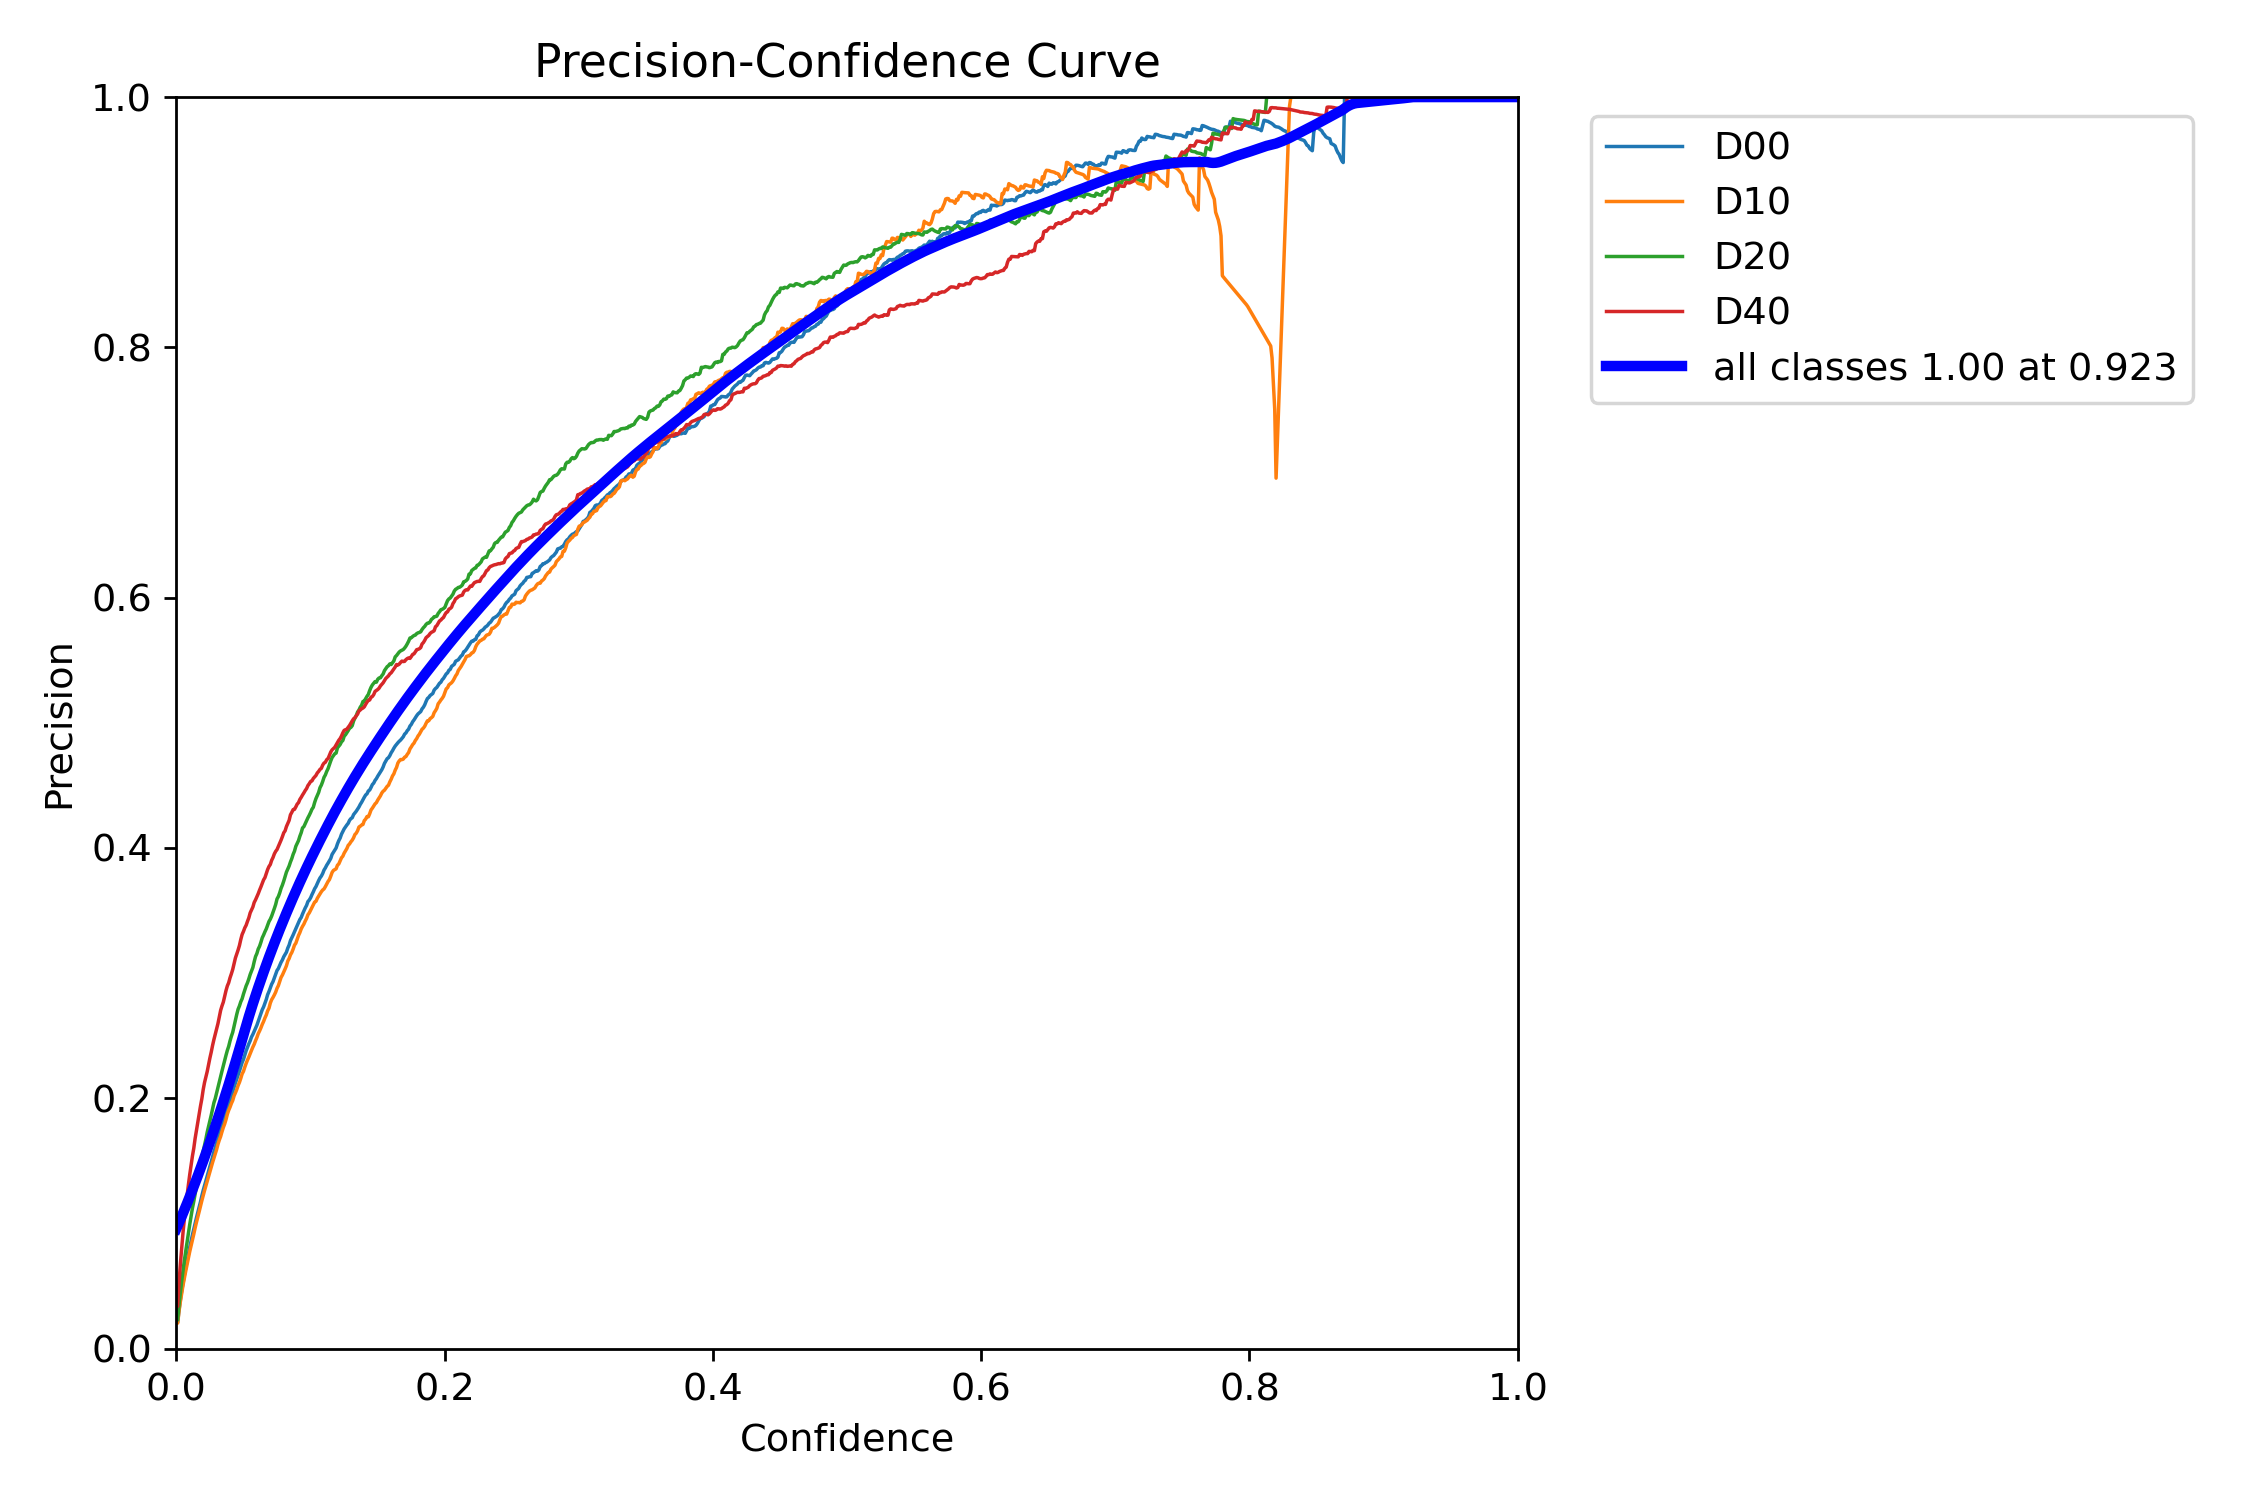

 Box Recall Curve


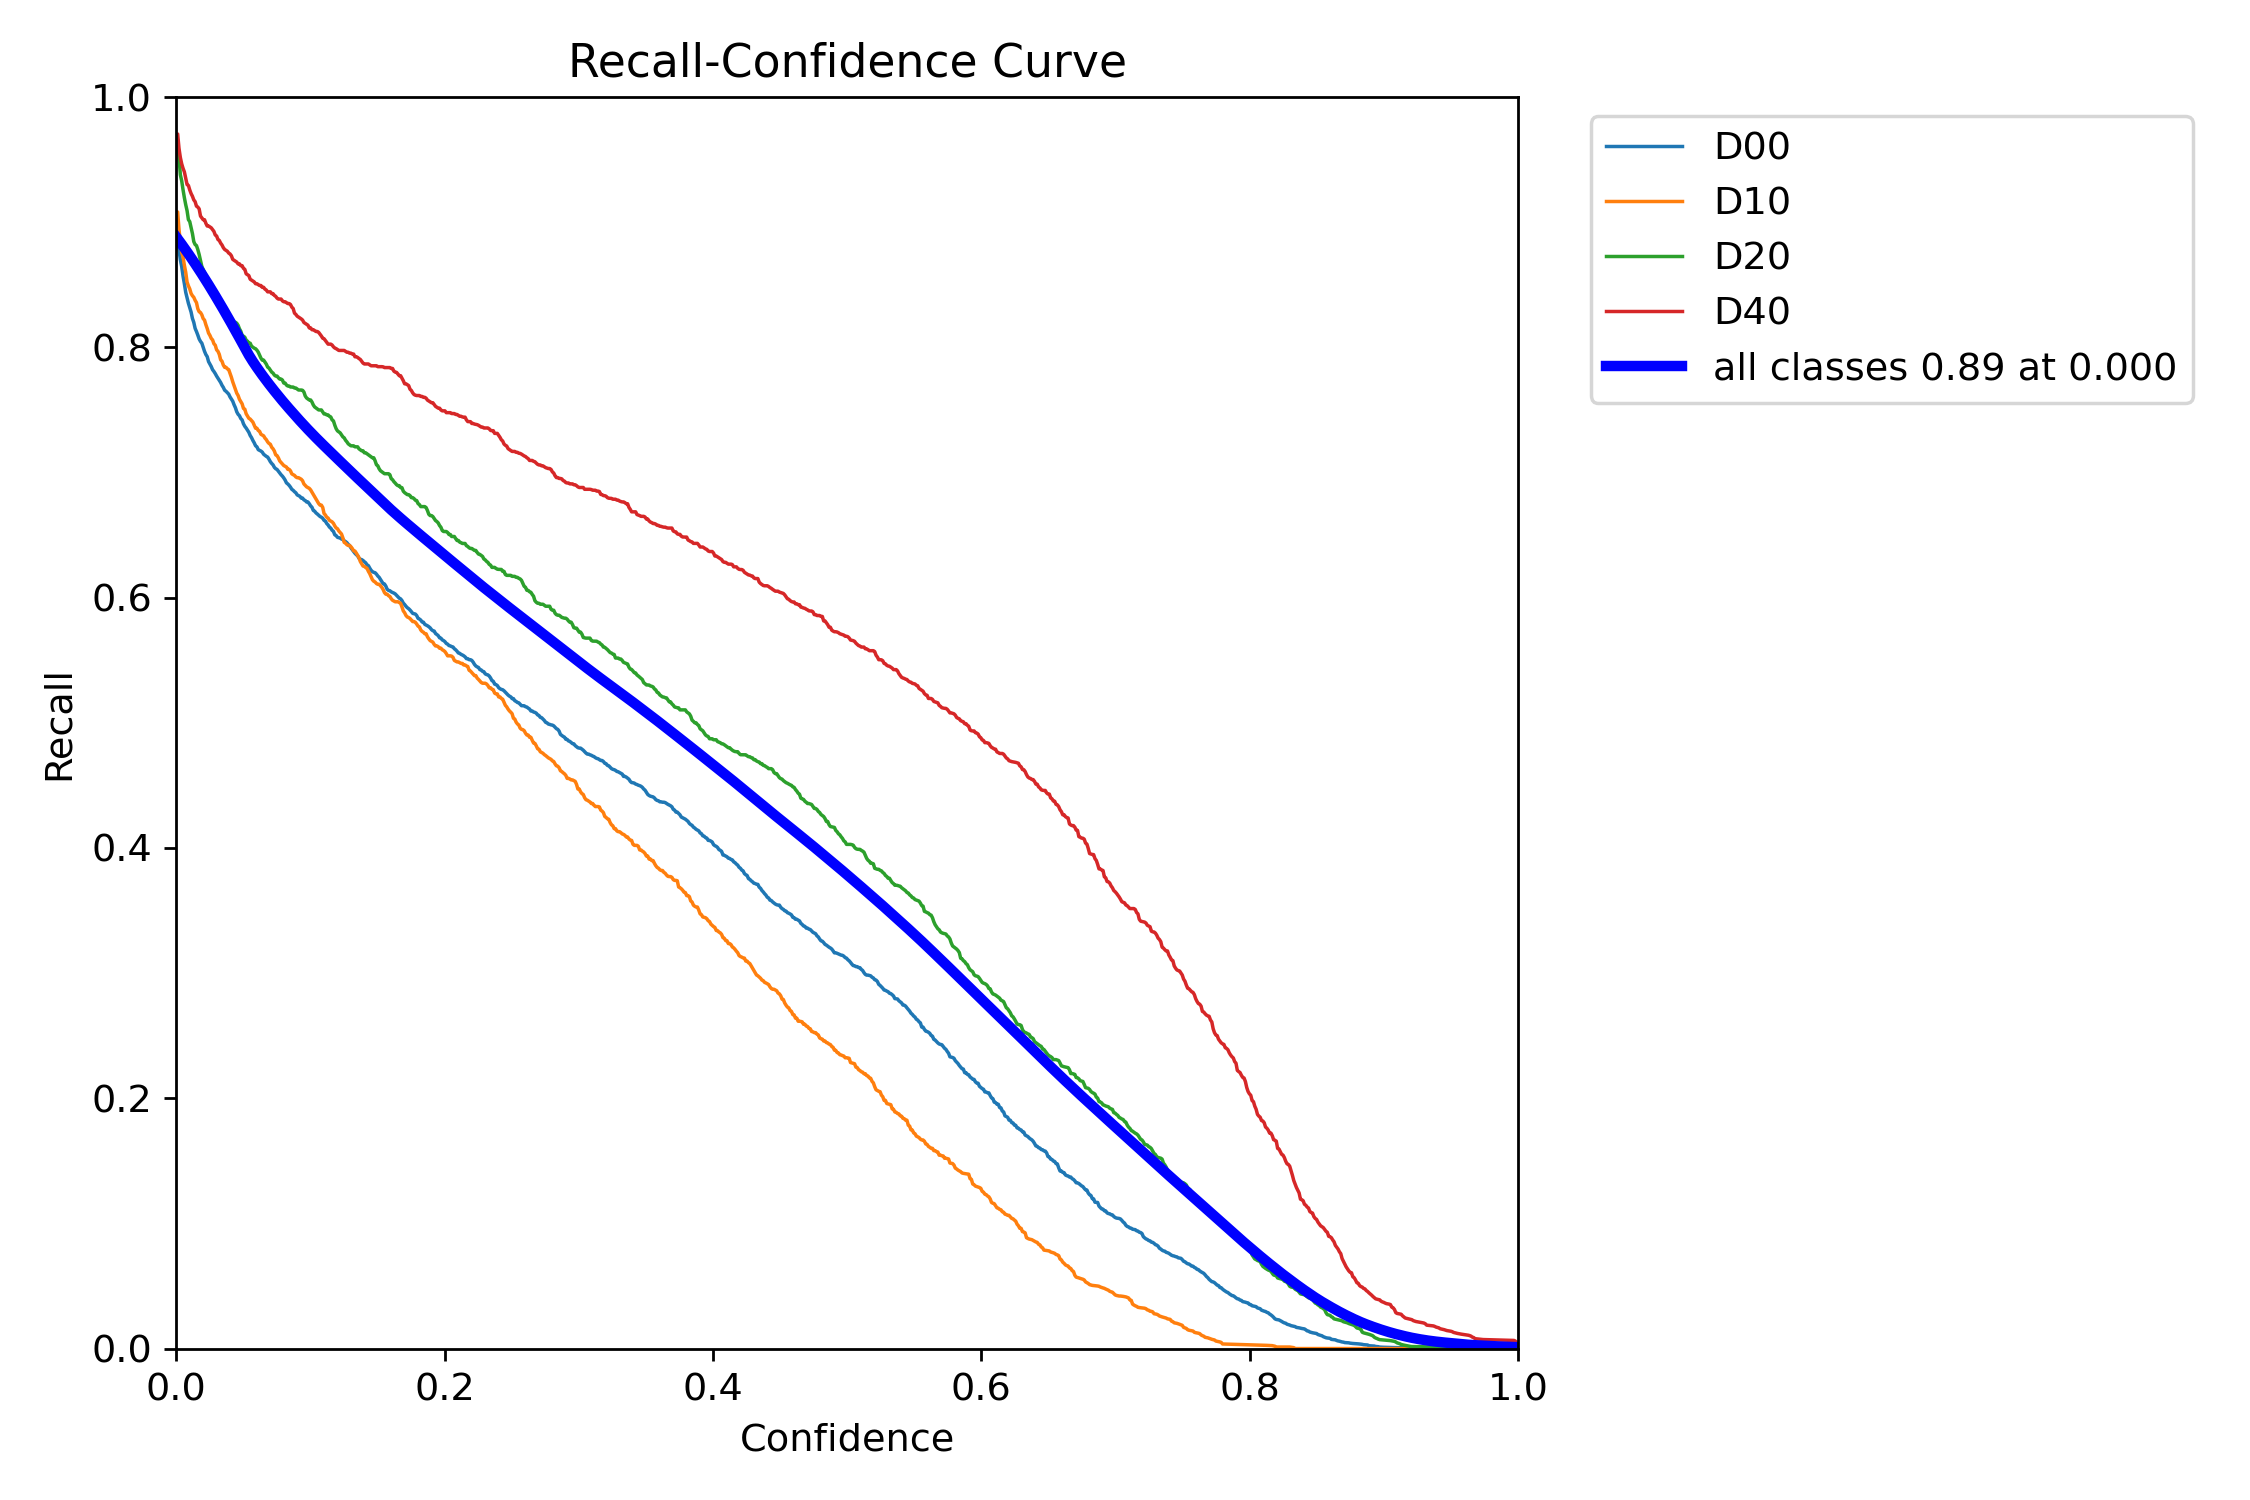

 Confusion Matrix


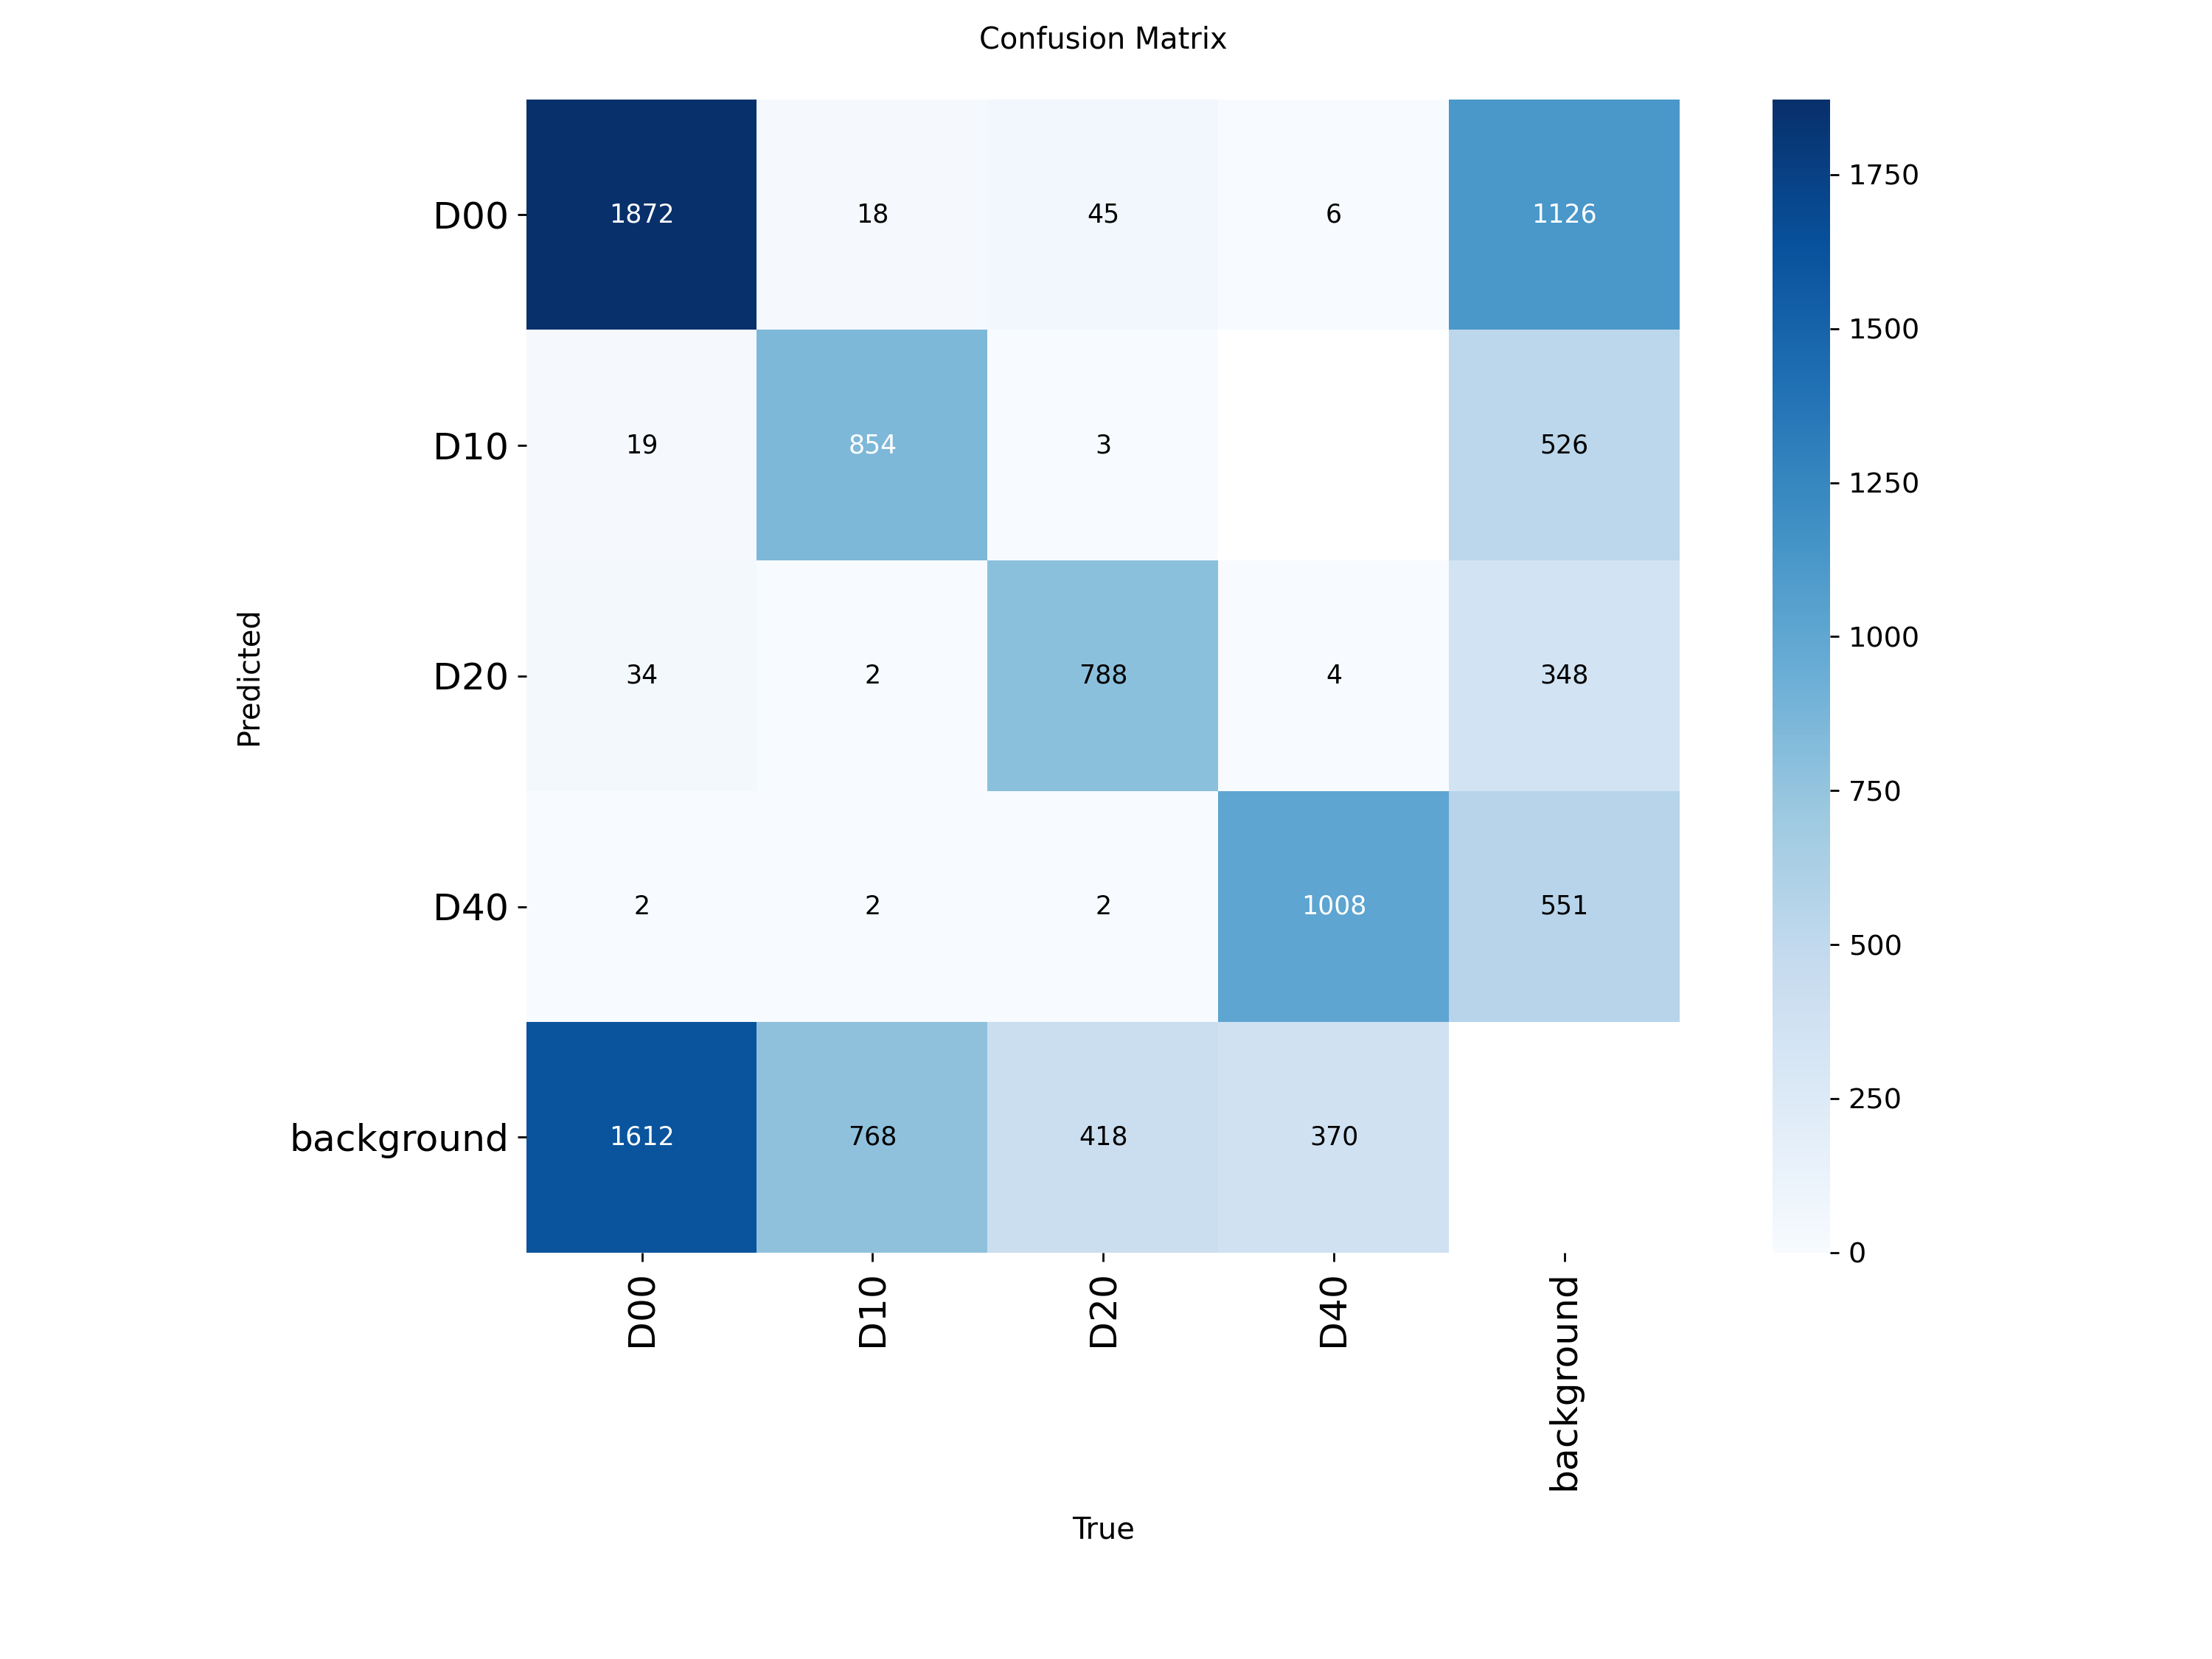

 Normalized Confusion Matrix


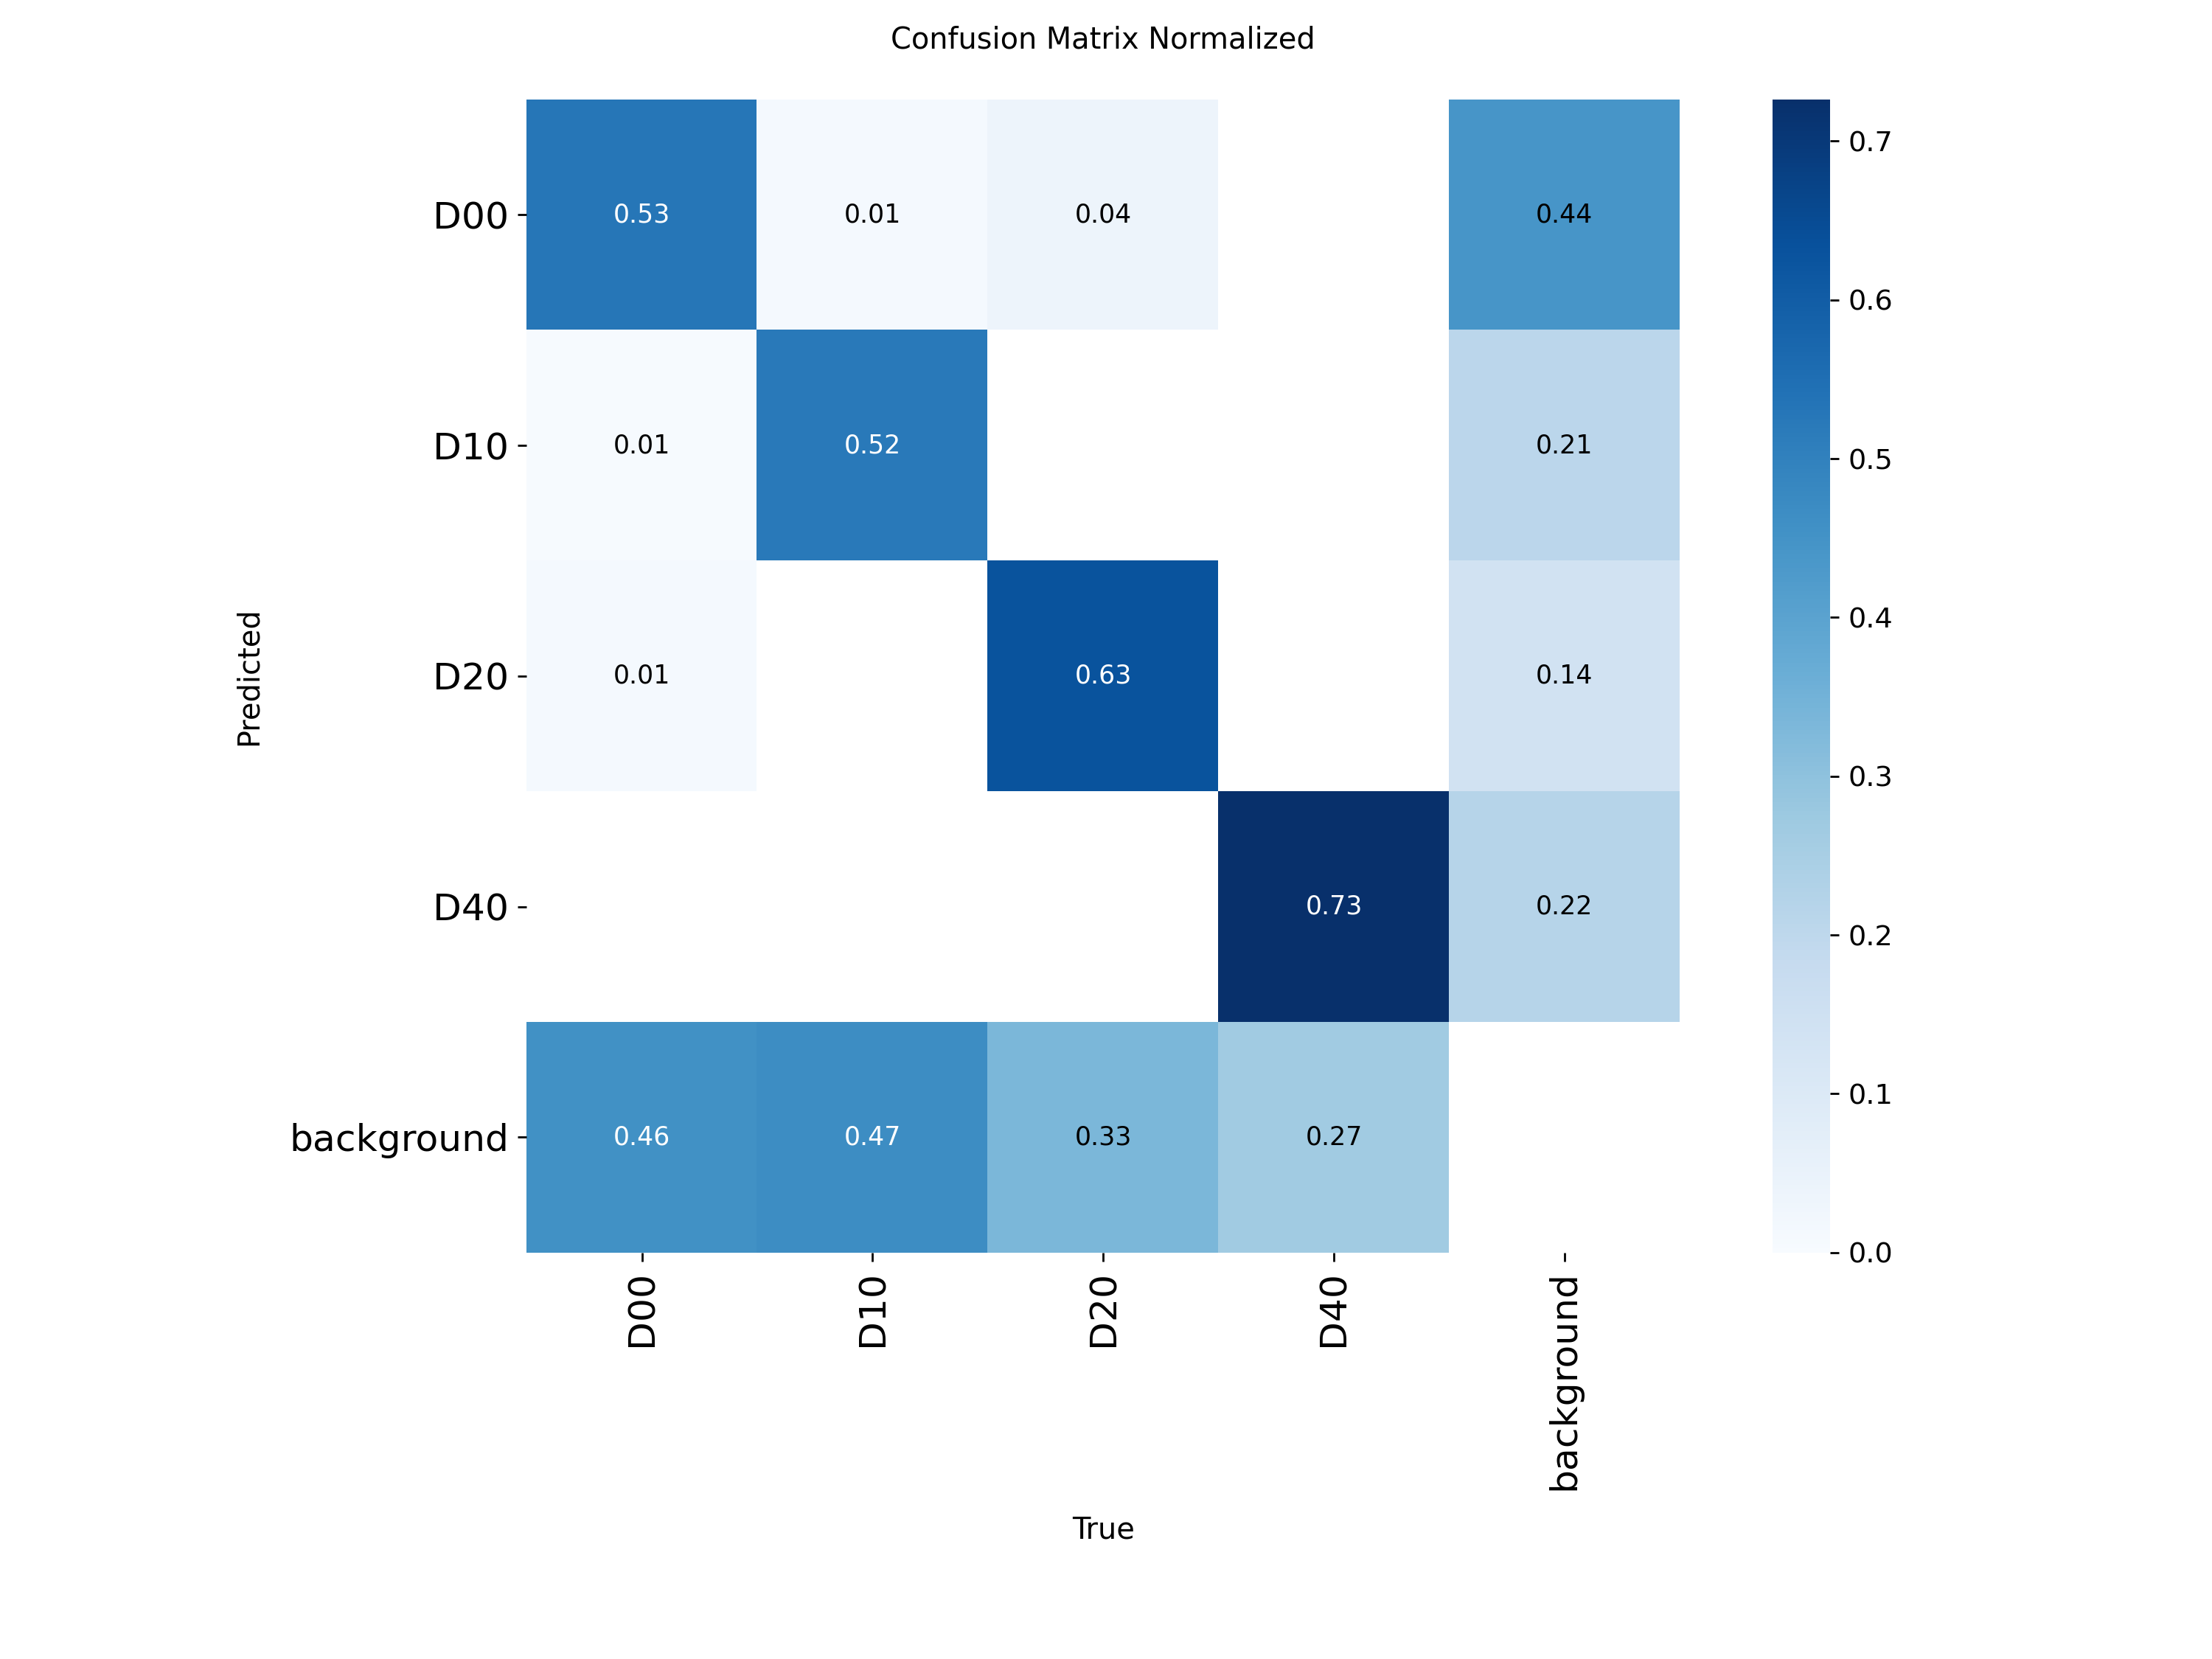

 Training Results Summary


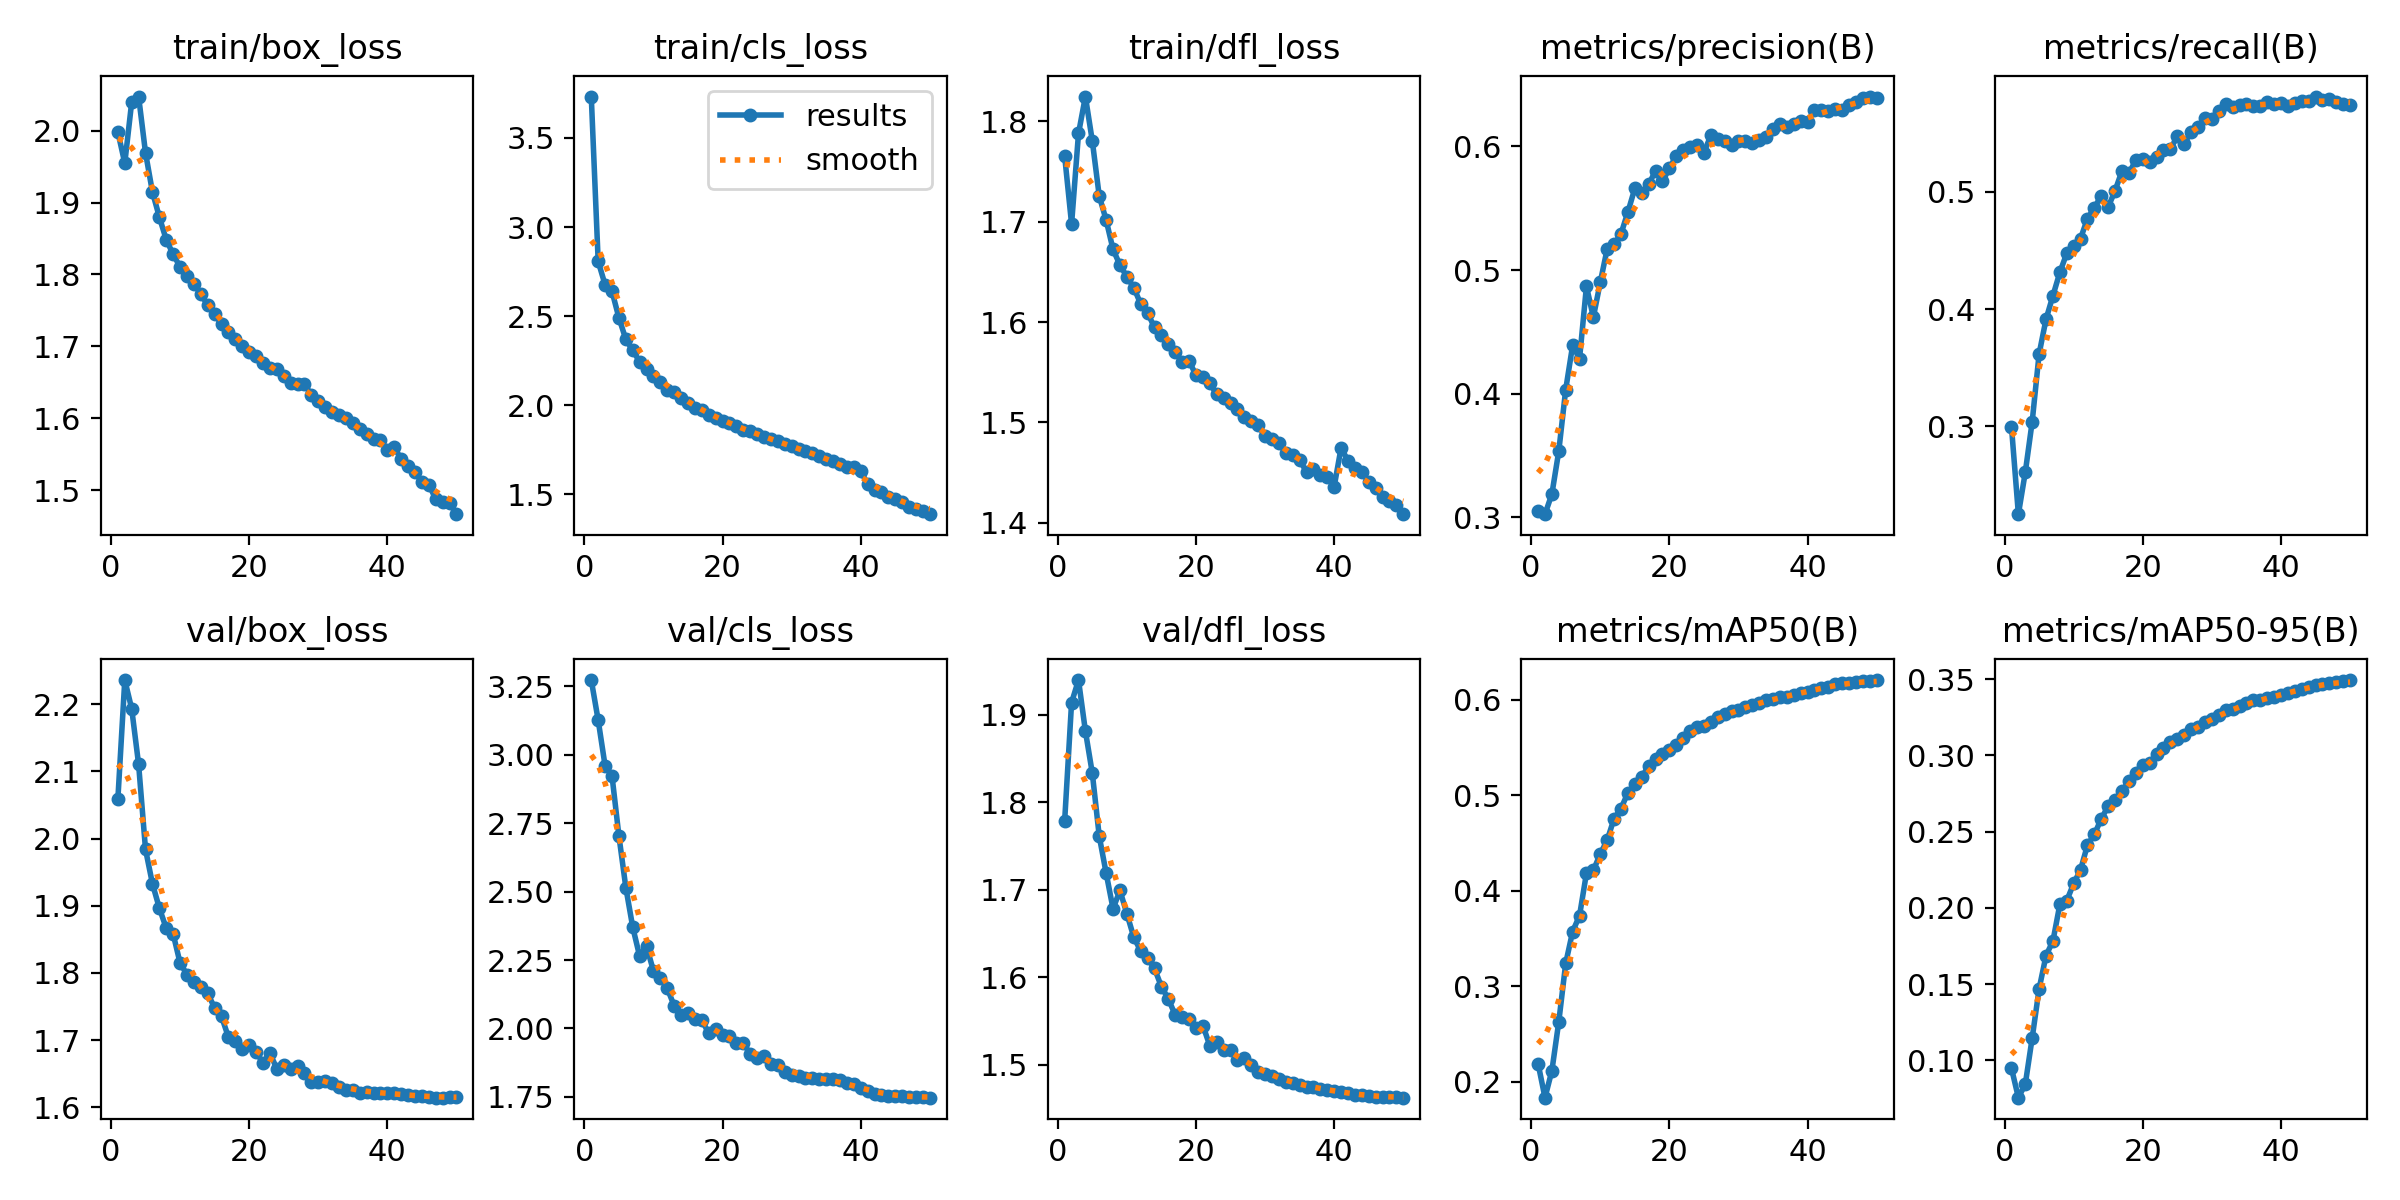

In [ ]:
from IPython.display import Image, display

base = "/content/drive/MyDrive/RD2022/runs/yolo_train"

print("Box Precision-Recall Curve")
display(Image(filename=f"{base}/BoxPR_curve.png"))

print(" Box F1 Curve")
display(Image(filename=f"{base}/BoxF1_curve.png"))

print(" Box Precision Curve")
display(Image(filename=f"{base}/BoxP_curve.png"))

print(" Box Recall Curve")
display(Image(filename=f"{base}/BoxR_curve.png"))

print(" Confusion Matrix")
display(Image(filename=f"{base}/confusion_matrix.png"))

print(" Normalized Confusion Matrix")
display(Image(filename=f"{base}/confusion_matrix_normalized.png"))

print(" Training Results Summary")
display(Image(filename=f"{base}/results.png"))


In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


In [ ]:
yolo_path = "/content/drive/MyDrive/RD2022/runs/yolo_train/weights/best.pt"
yolo_model = YOLO(yolo_path)
print("YOLO model loaded!")


YOLO model loaded!


In [ ]:
def yolo_opencv_predict(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = yolo_model.predict(source=img_rgb, save=False)

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            cls = int(box.cls[0])
            conf = float(box.conf[0])

            label = f"{r.names[cls]} {conf:.2f}"
            cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (255,0,0), 2)
            cv2.putText(img_rgb, label, (int(x1), int(y1)-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)

    plt.figure(figsize=(10,10))
    plt.imshow(img_rgb)
    plt.axis("off")



0: 640x640 3 D00s, 2 D10s, 1 D20, 7.3ms
Speed: 2.7ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


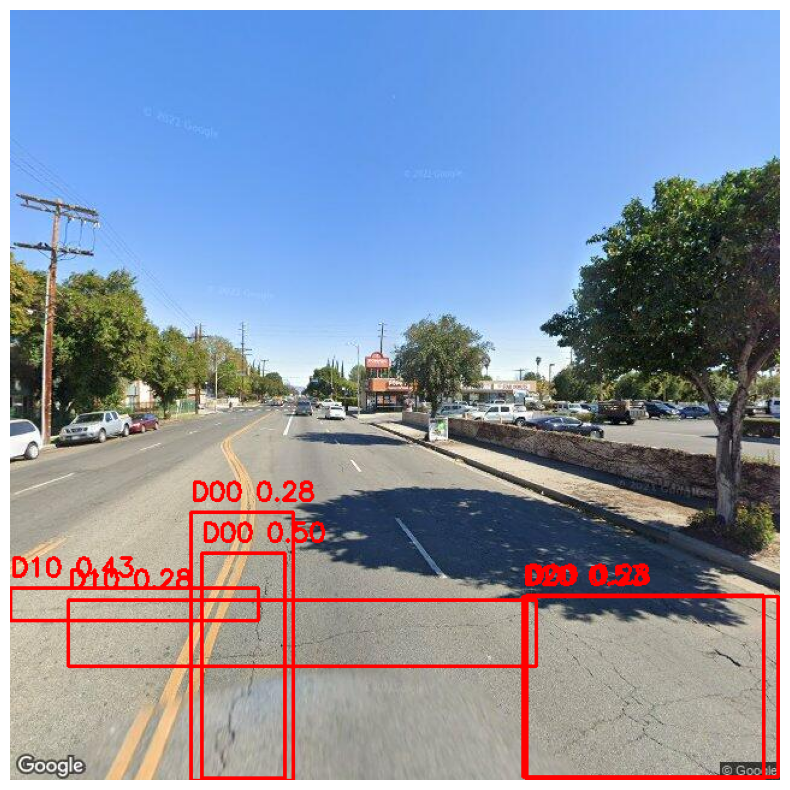

In [ ]:
test_image = "/content/drive/MyDrive/RD2022/test/images/United_States_000001.jpg"

yolo_opencv_predict(test_image)


In [ ]:
import shutil, os

drive_base = "/content/drive/MyDrive/RD2022"
local_base = "/content/RD2022_fast"


shutil.rmtree(local_base, ignore_errors=True)


folders = ["train/images", "val/images", "test/images"]

print("Copying only IMAGES to fast SSD...")

for f in folders:
    src = f"{drive_base}/{f}"
    dst = f"{local_base}/{f}"
    os.makedirs(dst, exist_ok=True)
    shutil.copytree(src, dst, dirs_exist_ok=True)

print("\n Done! Images are now on fast storage:", local_base)


Copying only IMAGES to fast SSD...

✅ Done! Images are now on fast storage: /content/RD2022_fast


In [ ]:
import shutil, os

drive_base = "/content/drive/MyDrive/RD2022"
local_base = "/content/RD2022_fast"

# TRAIN labels
src = f"{drive_base}/train/labels"
dst = f"{local_base}/train/labels"

shutil.rmtree(dst, ignore_errors=True)
shutil.copytree(src, dst)

print("TRAIN labels copied to SSD")

TRAIN labels copied to SSD


In [ ]:
src = f"{drive_base}/val/labels"
dst = f"{local_base}/val/labels"

shutil.rmtree(dst, ignore_errors=True)
shutil.copytree(src, dst)

print(" VAL labels copied to SSD")

 VAL labels copied to SSD


In [ ]:
src = f"{drive_base}/test/labels"
dst = f"{local_base}/test/labels"

shutil.rmtree(dst, ignore_errors=True)
shutil.copytree(src, dst)

print(" TEST labels copied to SSD")

 TEST labels copied to SSD


In [ ]:
import os
import pandas as pd

def fast_read_labels(image_dir, label_dir):
    df_list = []
    label_files = os.listdir(label_dir)

    for fname in label_files:
        if fname.endswith(".txt"):
            img = os.path.join(image_dir, fname.replace(".txt", ".jpg"))
            lbl = os.path.join(label_dir, fname)

            if not os.path.exists(img):
                continue

            with open(lbl, "r") as f:
                line = f.readline().strip()

            if not line:
                continue

            class_id = int(line.split()[0])
            df_list.append([img, class_id])

    return pd.DataFrame(df_list, columns=["image_path", "class_id"])


base = "/content/RD2022_fast"

train_df = fast_read_labels(f"{base}/train/images", f"{base}/train/labels")
val_df   = fast_read_labels(f"{base}/val/images",   f"{base}/val/labels")
test_df  = fast_read_labels(f"{base}/test/images",  f"{base}/test/labels")

print("Train:", train_df.shape)
print("Val:", val_df.shape)
print("Test:", test_df.shape)

print("\nClass Distribution:")
print(train_df["class_id"].value_counts())

Train: (18772, 2)
Val: (3921, 2)
Test: (3968, 2)

Class Distribution:
class_id
0    6831
3    3879
2    3771
1    2546
4    1745
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_df["class_id"] = train_df["class_id"].astype(str)
val_df["class_id"]   = val_df["class_id"].astype(str)

train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col="image_path",
    y_col="class_id",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    val_df,
    x_col="image_path",
    y_col="class_id",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 18772 validated image filenames belonging to 5 classes.
Found 3921 validated image filenames belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

num_classes = 5


base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 409s 668ms/step - accuracy: 0.4670 - loss: 1.3210 - val_accuracy: 0.5440 - val_loss: 1.1375
Epoch 2/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 335s 570ms/step - accuracy: 0.5415 - loss: 1.1509 - val_accuracy: 0.5585 - val_loss: 1.1336
Epoch 3/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 330s 561ms/step - accuracy: 0.5572 - loss: 1.1212 - val_accuracy: 0.5631 - val_loss: 1.0867
Epoch 4/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 330s 562ms/step - accuracy: 0.5679 - loss: 1.0976 - val_accuracy: 0.5667 - val_loss: 1.0848
Epoch 5/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 324s 552ms/step - accuracy: 0.5733 - loss: 1.0868 - val_accuracy: 0.5682 - val_loss: 1.0700
Epoch 6/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 326s 556ms/step - accuracy: 0.5754 - loss: 1.0726 - val_accuracy: 0.5856 - val_loss: 1.0660
Epoch 7/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 329s 560ms/step - accuracy: 0.5777 - loss: 1.0559 - val_accuracy: 0.5782 - val_loss: 1.0621
Epoch 8/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 323s 551ms/step - accuracy: 0.5810 -

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import tensorflow as tf

IMG_SIZE = (224, 224)

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)
base_model.trainable = False

In [ ]:

for layer in base_model.layers[:-30]:
    layer.trainable = False

for layer in base_model.layers[-30:]:
    layer.trainable = True

print("Fine-tuning: Last 30 layers are now trainable!")

Fine-tuning: Last 30 layers are now trainable!


In [ ]:
fine_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])

fine_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fine_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 1,691,013 (6.45 MB)

 Non-trainable params: 731,584 (2.79 MB)

In [ ]:
history_fine = fine_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

Epoch 1/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 349s 567ms/step - accuracy: 0.3633 - loss: 1.4998 - val_accuracy: 0.4996 - val_loss: 1.2430
Epoch 2/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 324s 552ms/step - accuracy: 0.5072 - loss: 1.2448 - val_accuracy: 0.5468 - val_loss: 1.1653
Epoch 3/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 322s 550ms/step - accuracy: 0.5349 - loss: 1.1706 - val_accuracy: 0.5726 - val_loss: 1.1227
Epoch 4/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 328s 558ms/step - accuracy: 0.5639 - loss: 1.1138 - val_accuracy: 0.5863 - val_loss: 1.0906
Epoch 5/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 321s 548ms/step - accuracy: 0.5759 - loss: 1.0953 - val_accuracy: 0.5955 - val_loss: 1.0739
Epoch 6/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 321s 547ms/step - accuracy: 0.5795 - loss: 1.0684 - val_accuracy: 0.5996 - val_loss: 1.0556
Epoch 7/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 324s 551ms/step - accuracy: 0.5903 - loss: 1.0421 - val_accuracy: 0.6011 - val_loss: 1.0399
Epoch 8/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 327s 557ms/step - accuracy: 0.5965 -

In [ ]:
history_fine2 = fine_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

Epoch 1/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 326s 555ms/step - accuracy: 0.6221 - loss: 0.9708 - val_accuracy: 0.6215 - val_loss: 1.0069
Epoch 2/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 322s 548ms/step - accuracy: 0.6305 - loss: 0.9464 - val_accuracy: 0.6205 - val_loss: 0.9924
Epoch 3/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 322s 549ms/step - accuracy: 0.6408 - loss: 0.9414 - val_accuracy: 0.6261 - val_loss: 0.9889
Epoch 4/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 324s 551ms/step - accuracy: 0.6452 - loss: 0.9233 - val_accuracy: 0.6259 - val_loss: 0.9886
Epoch 5/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 328s 559ms/step - accuracy: 0.6388 - loss: 0.9219 - val_accuracy: 0.6251 - val_loss: 0.9896


In [ ]:
fine_model.save("/content/drive/MyDrive/RD2022/mobilenet_finetuned.h5")

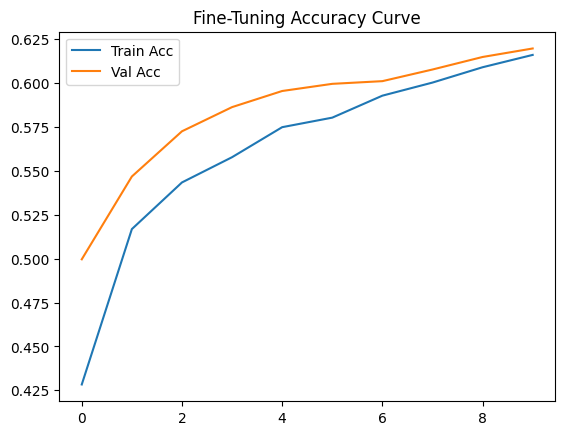

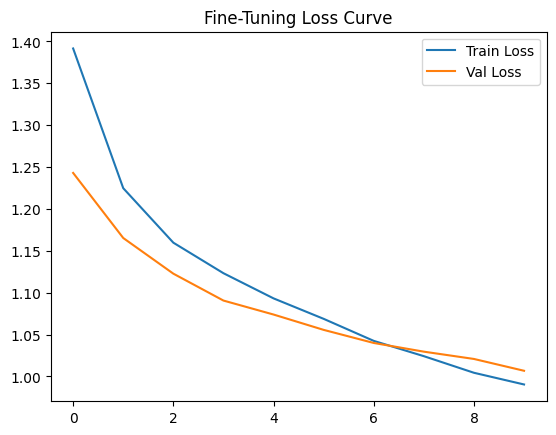

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_fine.history['accuracy'], label='Train Acc')
plt.plot(history_fine.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Fine-Tuning Accuracy Curve")
plt.show()

plt.plot(history_fine.history['loss'], label='Train Loss')
plt.plot(history_fine.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Fine-Tuning Loss Curve")
plt.show()

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

IMG_SIZE = 224

def preprocess_image(path):
    """Load + resize + normalize image."""
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_norm = img_resized / 255.0
    return img_norm, img

In [ ]:
def predict_batch(model, image_paths, class_names):
    images = []
    originals = []

    for p in image_paths:
        img_norm, original = preprocess_image(p)
        images.append(img_norm)
        originals.append(original)

    images = np.array(images)

    preds = model.predict(images)
    pred_labels = preds.argmax(axis=1)

    return pred_labels, originals

In [ ]:
import random
import glob


test_images = glob.glob("/content/RD2022_fast/test/images/*.jpg")
sample_paths = random.sample(test_images, 12)

sample_paths[:5]

['/content/RD2022_fast/test/images/United_States_000775.jpg',
 '/content/RD2022_fast/test/images/Czech_001694.jpg',
 '/content/RD2022_fast/test/images/Norway_001173.jpg',
 '/content/RD2022_fast/test/images/Norway_000477.jpg',
 '/content/RD2022_fast/test/images/Norway_007278.jpg']

In [ ]:
class_names = ["D00", "D10", "D20", "D40", "Other"]

preds, originals = predict_batch(fine_model, sample_paths, class_names)

preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 2])

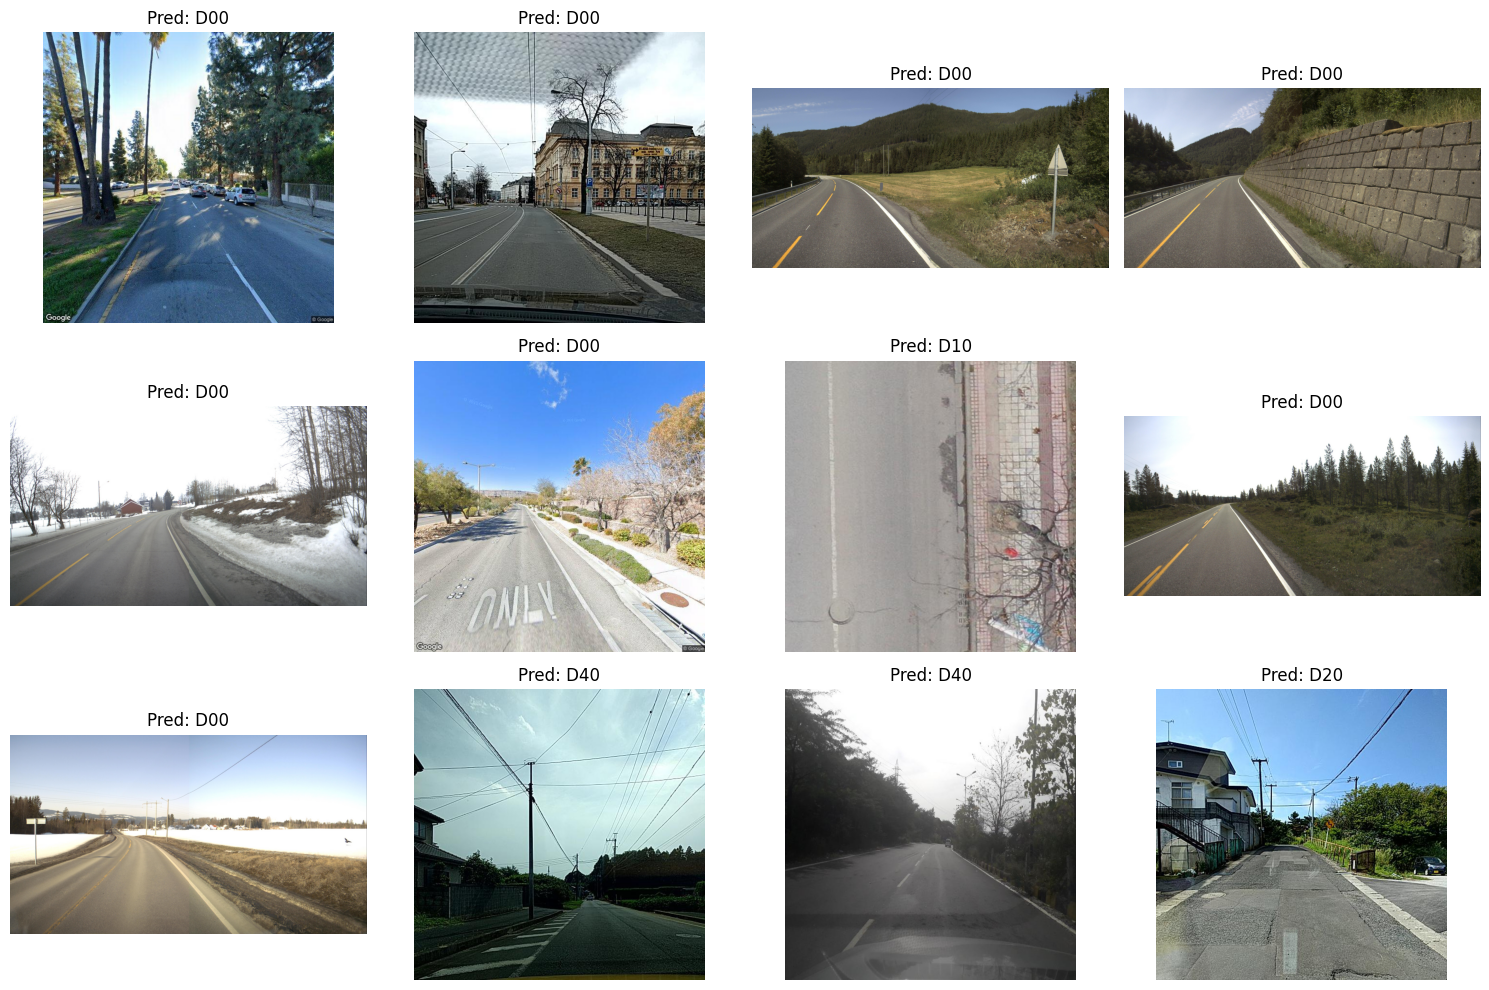

In [ ]:
plt.figure(figsize=(15, 10))

for i in range(len(originals)):
    plt.subplot(3, 4, i+1)
    plt.imshow(originals[i])
    plt.title(f"Pred: {class_names[preds[i]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Convert test labels to string (required for categorical mode)
test_df["class_id"] = test_df["class_id"].astype(str)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_dataframe(
    test_df,
    x_col="image_path",
    y_col="class_id",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 3968 validated image filenames belonging to 5 classes.


In [ ]:
# --- Evaluation on Test Set ---
test_loss, test_acc = model.evaluate(test_gen)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


124/124 ━━━━━━━━━━━━━━━━━━━━ 34s 274ms/step - accuracy: 0.6036 - loss: 1.0341
Test Accuracy: 0.6096270084381104
Test Loss: 1.013636589050293


124/124 ━━━━━━━━━━━━━━━━━━━━ 33s 228ms/step


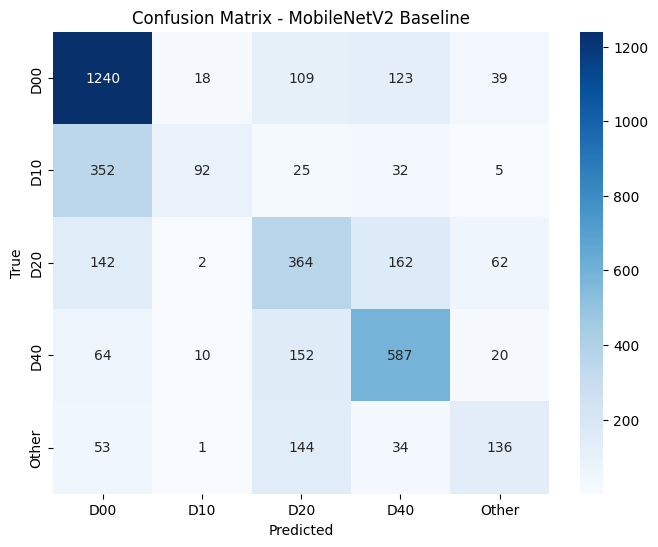

              precision    recall  f1-score   support

         D00       0.67      0.81      0.73      1529
         D10       0.75      0.18      0.29       506
         D20       0.46      0.50      0.48       732
         D40       0.63      0.70      0.66       833
       Other       0.52      0.37      0.43       368

    accuracy                           0.61      3968
   macro avg       0.60      0.51      0.52      3968
weighted avg       0.62      0.61      0.59      3968



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
test_gen.reset()
pred_probs = model.predict(test_gen)
pred_classes = np.argmax(pred_probs, axis=1)

# True labels
true_classes = test_gen.classes

# Class names
class_names = ["D00", "D10", "D20", "D40", "Other"]

# Confusion Matrix
cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MobileNetV2 Baseline")
plt.show()

# Classification report
print(classification_report(true_classes, pred_classes, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


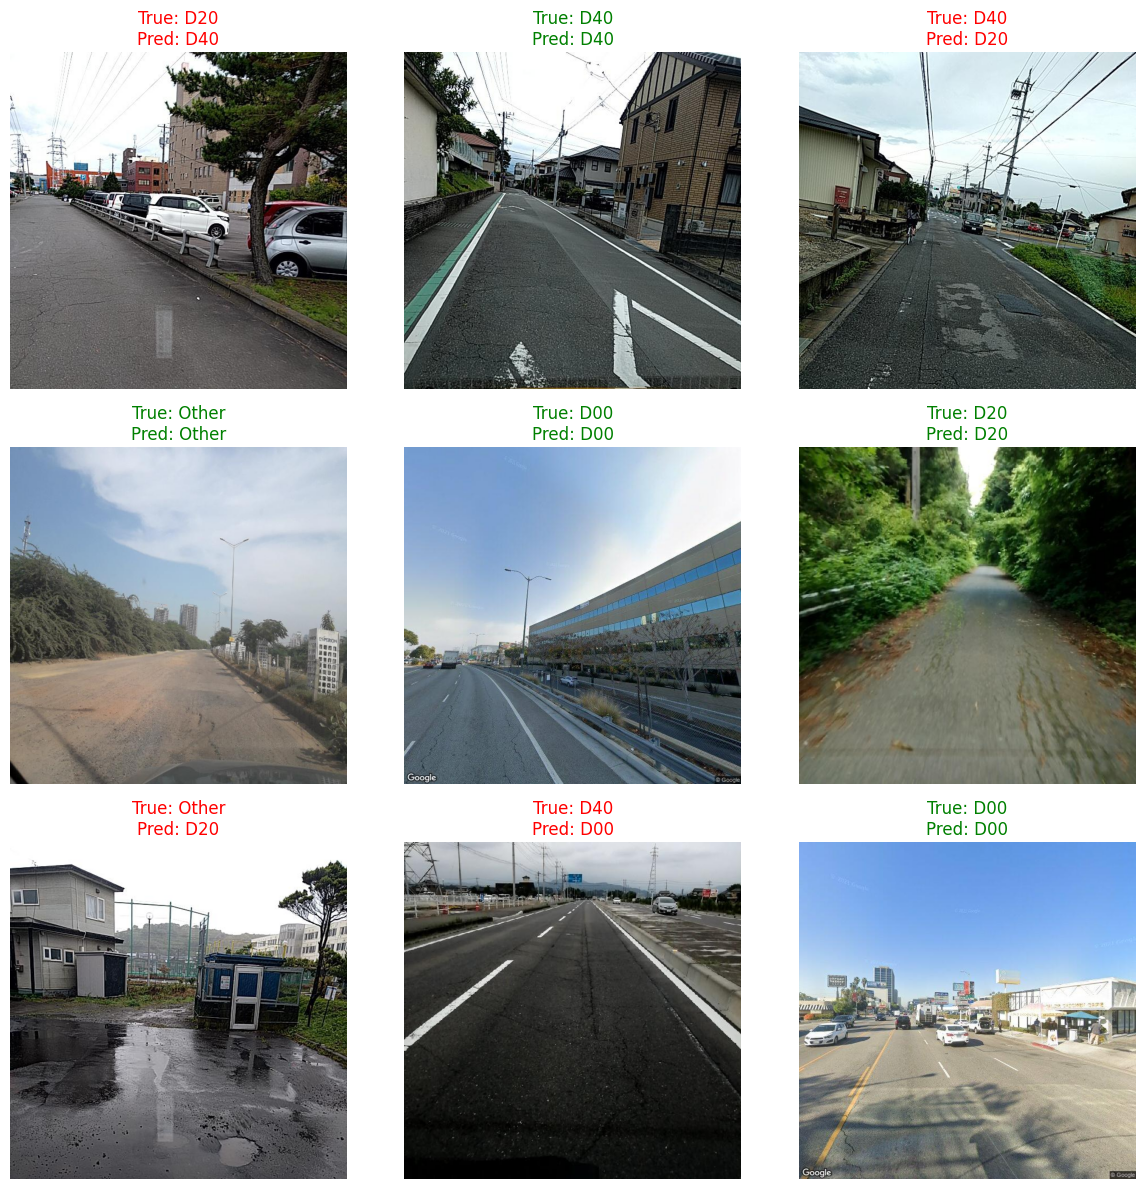

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2


sample_paths = random.sample(list(test_df["image_path"]), 9)

plt.figure(figsize=(12,12))

for i, img_path in enumerate(sample_paths):
    # Load image
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Preprocess
    resized = cv2.resize(img_rgb, (224,224))
    resized = resized / 255.0
    pred = model.predict(np.expand_dims(resized, axis=0))
    pred_class = np.argmax(pred)

    # True label
    fname = os.path.basename(img_path).replace(".jpg", ".txt")
    lbl_path = f"/content/RD2022_fast/test/labels/{fname}"

    with open(lbl_path, "r") as f:
        true_id = int(f.readline().split()[0])

    true_label = class_names[true_id]
    pred_label = class_names[pred_class]

    # Plot
    plt.subplot(3,3,i+1)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(f"True: {true_label}\nPred: {pred_label}",
              color=("green" if true_label == pred_label else "red"))

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_dataframe(
    test_df,
    x_col="image_path",
    y_col="class_id",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 3968 validated image filenames belonging to 5 classes.


In [ ]:
import numpy as np

pred_probs = fine_model.predict(test_gen)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = test_gen.classes

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


124/124 ━━━━━━━━━━━━━━━━━━━━ 33s 232ms/step


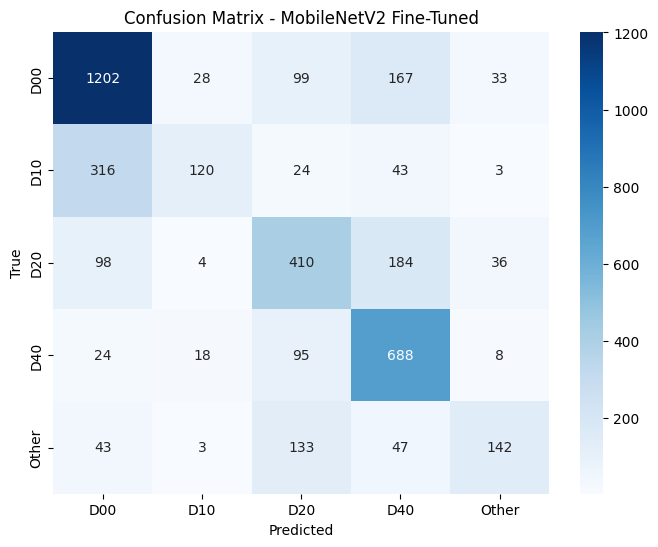

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MobileNetV2 Fine-Tuned")
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/RD2022/models/mobilenet_baseline.keras")

NameError: name 'model' is not defined

In [ ]:
fine_model.save("/content/drive/MyDrive/RD2022/models/mobilenet_finetuned.keras")

In [ ]:
from ultralytics import YOLO
import tensorflow as tf

yolo_model = YOLO("/content/drive/MyDrive/RD2022/runs/yolo_train/weights/best.pt")
mobilenet_model = tf.keras.models.load_model("/content/drive/MyDrive/RD2022/mobilenet_finetuned.h5")

print("Both models loaded successfully!")

Both models loaded successfully!


In [ ]:
!pip install streamlit ultralytics tensorflow opencv-python-headless

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import cv2
from ultralytics import YOLO
import tensorflow as tf
from PIL import Image
import os
import pandas as pd
from datetime import datetime

# -----------------------------------
# PAGE CONFIG
# -----------------------------------
st.set_page_config(
    page_title="Road Damage Detection",
    page_icon="🚗",
    layout="wide"
)

# -----------------------------------
# CUSTOM THEME (BEIGE STYLE)
# -----------------------------------
st.markdown("""
<style>
html, body, .main {
    background-color: #EED9C4 !important;
    color: #2F2F2F;
    font-family: sans-serif;
}

.title {
    text-align: center;
    font-size: 40px;
    font-weight: 800;
    color: #E07A2F;
}

.subtitle {
    text-align: center;
    font-size: 20px;
    color: #FF4F00;
    margin-bottom: 30px;
}

.section-card {
    background: #FAF7F3;
    padding: 25px;
    border-radius: 14px;
    box-shadow: 0 4px 14px rgba(0,0,0,0.06);
    border-left: 6px solid #E07A2F;
    margin-bottom: 30px;
}

.section-title {
    font-size: 22px;
    font-weight: 700;
    color: #E07A2F;
    margin-bottom: 12px;
}

.stButton>button {
    background-color: #E07A2F !important;
    color: white !important;
    border-radius: 8px !important;
    font-weight: 600;
}

.stDownloadButton>button {
    background-color: #7FAFC6 !important;
    color: white !important;
    border-radius: 8px !important;
}

.footer {
    text-align: center;
    color: #FF4F00;
    margin-top: 40px;
    opacity: 0.7;
}
</style>
""", unsafe_allow_html=True)

# -----------------------------------
# PATHS
# -----------------------------------
SAVE_DIR = "detections"
CSV_PATH = "results_log.csv"
os.makedirs(SAVE_DIR, exist_ok=True)

# -----------------------------------
# LOAD MODELS
# -----------------------------------
yolo_model = YOLO("/content/drive/MyDrive/RD2022/runs/yolo_train/weights/best.pt")
mobilenet = tf.keras.models.load_model("/content/drive/MyDrive/RD2022/mobilenet_finetuned.h5")

class_names = ["D00", "D10", "D20", "D40", "Other"]

# -----------------------------------
# HELPER FUNCTIONS
# -----------------------------------
def run_yolo(image, base_name):
    results = yolo_model.predict(image, imgsz=640, conf=0.25)
    plotted = results[0].plot()

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    save_path = os.path.join(SAVE_DIR, f"{base_name}yolo{timestamp}.jpg")

    cv2.imwrite(save_path, cv2.cvtColor(plotted, cv2.COLOR_RGB2BGR))
    return plotted, save_path

def classify_mobilenet(image):
    img = cv2.resize(image, (224, 224))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)

    preds = mobilenet.predict(img)
    class_id = np.argmax(preds[0])
    confidence = preds[0][class_id]
    return class_names[class_id], float(confidence)

def log_to_csv(image_name, predicted_class, confidence):
    row = {
        "image_name": image_name,
        "predicted_class": predicted_class,
        "confidence": confidence,
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }
    df = pd.DataFrame([row])

    if os.path.exists(CSV_PATH):
        df.to_csv(CSV_PATH, mode="a", header=False, index=False)
    else:
        df.to_csv(CSV_PATH, index=False)

# -----------------------------------
# HEADER
# -----------------------------------
st.markdown("<div class='title'>🚗 Road Damage Detection & Classification</div>", unsafe_allow_html=True)
st.markdown(
    "<div class='subtitle'>YOLOv8 Detection + MobileNetV2 Fine-Tuned Classification</div>",
    unsafe_allow_html=True
)

# -----------------------------------
# MAIN UI
# -----------------------------------
uploaded_file = st.file_uploader("📤 Upload a road image", type=["jpg", "jpeg", "png"])

if uploaded_file:
    image = np.array(Image.open(uploaded_file).convert("RGB"))
    base_name = uploaded_file.name.split(".")[0]

    # Uploaded Image
    st.markdown("<div class='section-card'>", unsafe_allow_html=True)
    st.markdown("<div class='section-title'>📷 Uploaded Image</div>", unsafe_allow_html=True)
    st.image(image, use_container_width=True)
    st.markdown("</div>", unsafe_allow_html=True)

    # YOLO Detection
    st.markdown("<div class='section-card'>", unsafe_allow_html=True)
    st.markdown("<div class='section-title'>🎯 YOLOv8 Detection</div>", unsafe_allow_html=True)

    yolo_img, saved_path = run_yolo(image, base_name)
    st.image(yolo_img, use_container_width=True)
    st.success(f"Detection image saved at: {saved_path}")

    with open(saved_path, "rb") as f:
        st.download_button(
            label="⬇ Download Detection Image",
            data=f,
            file_name=os.path.basename(saved_path),
            mime="image/jpeg"
        )

    st.markdown("</div>", unsafe_allow_html=True)

    # MobileNet Classification
    st.markdown("<div class='section-card'>", unsafe_allow_html=True)
    st.markdown("<div class='section-title'>🔍 MobileNetV2 Classification</div>", unsafe_allow_html=True)

    class_name, conf = classify_mobilenet(image)
    st.success(f"Predicted Class: *{class_name}* ({conf*100:.2f}%)")

    log_to_csv(uploaded_file.name, class_name, conf)

    st.markdown("</div>", unsafe_allow_html=True)

# -----------------------------------
# FOOTER
# -----------------------------------
st.markdown(
    "<div class='footer'>Developed by Nasim • Road Damage AI Project © 2025</div>",
    unsafe_allow_html=True
)

Overwriting app.py


In [ ]:
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64 -O cloudflared
!chmod +x cloudflared

In [ ]:
!nohup streamlit run app.py --server.port=8501 --server.address=0.0.0.0 &

nohup: appending output to 'nohup.out'


In [ ]:
!./cloudflared tunnel --url http://localhost:8501 --no-autoupdate

2025-12-15T06:48:25Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-12-15T06:48:25Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-12-15T06:48:28Z INF +--------------------------------------------------------------------------------------------+
2025-12-15T06:48:28Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-12-15T06:48:28Z INF |  https://registrar-superb-ascii-response.trycloudflare